In [1]:
from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

rng = np.random.RandomState(0)
cmap_data = plt.cm.tab20b
cmap_cv = plt.cm.tab20b
n_splits = 10

(968,)
[0.07412946 0.21067221 0.06617397 0.10532953 0.21792555 0.11207423
 0.12427651 0.00492936 0.07607136 0.00841784]
[ 9 33  3  2 24 10 10  1  7  1]


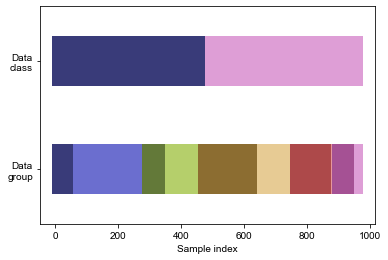

In [10]:
# Generate the class/group data
n_points = 100
X = rng.randn(968, 1)

percentiles_classes = [0.5, 0.5]
y = np.hstack([[ii] * int(969 * perc) for ii, perc in enumerate(percentiles_classes)])
print(y.shape)

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
print(group_prior)
groups = np.repeat(np.arange(10), rng.multinomial(968, group_prior))
print(rng.multinomial(100, group_prior))


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


visualize_groups(y, groups, "no groups")


In [2]:
from matplotlib.font_manager import FontProperties
from matplotlib.pyplot import MultipleLocator
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    font = FontProperties()
    font.set_name('Arial')

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    x_major_locator = MultipleLocator(100)
    ax.xaxis.set_major_locator(x_major_locator)
    yticklabels = list(range(n_splits)) 
    ax.set(
        yticks=np.arange(n_splits) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="Cross-validation iteration",
        ylim=[n_splits + 0.2, -0.2],
        xlim=[0, 968],
        
    )
    font.set_size(16)
    ax.set_xlabel("Sample index",fontproperties=font)
    ax.set_ylabel("Cross-validation iteration",fontproperties=font)

    plt.title("Stratified 10-fold cross-validation", fontname="Arial", \
    fontweight="bold", fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

In [4]:
from matplotlib import font_manager


for font in font_manager.fontManager.ttflist:
    # 查看字体名以及对应的字体文件名
    print(font.name, '-', font.fname)

DejaVu Serif - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif-Italic.ttf
cmex10 - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmex10.ttf
DejaVu Serif Display - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerifDisplay.ttf
DejaVu Serif - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif.ttf
DejaVu Sans Mono - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSansMono-BoldOblique.ttf
DejaVu Sans - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf
DejaVu Sans - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans-Oblique.ttf
STIXGeneral - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXGeneralBolIta.ttf
cmr10 - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmr10.ttf
STIXNonUnicode - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUniIta.ttf
STIXSizeTwoSym - f:\Python\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXS

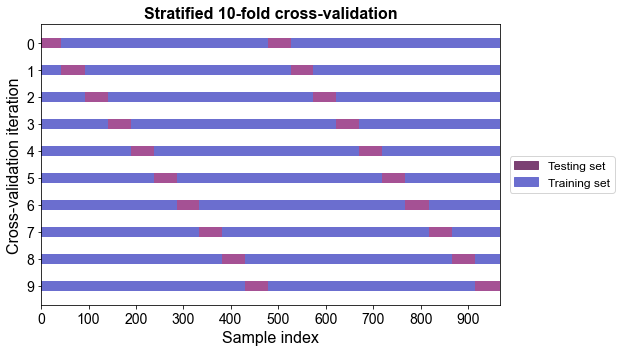

In [27]:
cvs = [StratifiedKFold]
plt.rcParams['font.sans-serif'] = 'Arial'
for cv in cvs:
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_cv_indices(cv(n_splits), X, y, groups, ax, n_splits)
    font = FontProperties()
    font.set_name('Arial')
    
    font.set_size(12)
    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.1))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.4),
        prop=font
    )

    plt.savefig('Kfold.pdf', bbox_inches = 'tight')
    # Make the legend fit

    plt.tight_layout()
    fig.subplots_adjust(right=0.7)


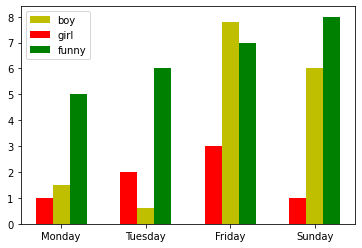

In [5]:
import matplotlib.pyplot as plt
 
name_list = ['Monday','Tuesday','Friday','Sunday']
num_list = [1.5,0.6,7.8,6]
num_list1 = [1,2,3,1]
num_list2 = [5,6,7,8]

x =list(range(len(num_list)))

total_width, n = 0.4, 2
width = total_width / n
 
plt.bar(x, num_list, width=width, label='boy',tick_label = name_list,fc = 'y')

for i in range(len(x)):
    x[i] = x[i] - width
plt.bar(x, num_list1, width=width, label='girl',fc = 'r')

for i in range(len(x)):
    x[i] = x[i] + 2*width
plt.bar(x, num_list2, width=width, label='funny',fc = 'g')
plt.legend()
plt.show()

In [13]:
#读取 excel 表格
import pandas as pd

acc_value = []
f1_value = []
acc_max = []
acc_min = []
f1_max = []
f1_min = []

df = pd.read_excel('./Unimodal result.xlsx', sheet_name='Sheet2')
# print(df)
df = df.values.tolist()

for i in range(0, 10):
    for j in range(0, 12):
        acc_value.append(df[4 + i*13][1+6*j])
        acc_value.append(df[4 + i*13][2+6*j])
        acc_value.append(df[4 + i*13][3+6*j])
        acc_value.append(df[4 + i*13][4+6*j])
        f1_value.append(df[7 + i*13][1+6*j])
        f1_value.append(df[7 + i*13][2+6*j])
        f1_value.append(df[7 + i*13][3+6*j])
        f1_value.append(df[7 + i*13][4+6*j])
    # acc_max.append(df[6 + i*11])
    # acc_min.append(df[7 + i*11])
    # f1_max.append(df[8 + i*11])
    # f1_min.append(df[9 + i*11])

acc_value = np.array(acc_value).T
print("Acc:", acc_value)
print(acc_value.shape)

f1_value = np.array(f1_value).T
print("F1-score:", f1_value)

# acc_max = np.array(acc_max).T
# print("Acc max diff:", acc_max)

# acc_min = np.array(acc_min).T
# print("Acc min diff:", acc_min)

# f1_max = np.array(f1_max).T
# print("F1-score max diff:", f1_max)

# f1_min = np.array(f1_min).T
# print("F1-score min diff:", f1_min)


Acc: [0.79630584 0.6742805  0.83155069 0.82432345 0.74271907 0.74375
 0.73239905 0.7106744  0.80989046 0.75928909 0.80578823 0.79024914
 0.70459622 0.70562715 0.68804768 0.67051117 0.63947595 0.59698239
 0.61784794 0.60332904 0.82426976 0.65576675 0.82642826 0.81093213
 0.82433419 0.68975515 0.8171177  0.8016323  0.64882947 0.61775129
 0.6095683  0.60737758 0.86152277 0.81607603 0.85743127 0.84808849
 0.70347938 0.64769115 0.6858677  0.64664948 0.88427835 0.8615872
 0.89255799 0.88843428 0.79644545 0.64657431 0.79233247 0.7623604
 0.64359966 0.30675473 0.82954253 0.82954253 0.60229811 0.57321735
 0.71588273 0.73137887 0.64350301 0.41312285 0.7902921  0.78612543
 0.56292955 0.38533076 0.66842784 0.66324098 0.55169674 0.38741409
 0.57651418 0.60428479 0.70446735 0.31196306 0.81920103 0.82334622
 0.6961018  0.27996134 0.80369416 0.80779639 0.62886598 0.4661512
 0.5869201  0.58675902 0.73336555 0.40875215 0.86156572 0.85228737
 0.61153351 0.36774055 0.67560137 0.69109751 0.56815936 0.26961

In [34]:
disorder = []
for i in range(0, 10):

    for j in range(0, 48):
        if int(j / 4) == 0:
            disorder.append('Overall condition')
        if int(j / 4) == 1:
            disorder.append('Depression')
        if int(j / 4) == 2:
            disorder.append('Interpersonal tension')
        if int(j / 4) == 3:
            disorder.append('Anxiety')
        if int(j / 4) == 4:
            disorder.append('Obsessive-compulsive')
        if int(j / 4) == 5:
            disorder.append('Paranoia')
        if int(j / 4) == 6:
            disorder.append('Hostility')
        if int(j / 4) == 7:
            disorder.append('Academic stress')
        if int(j / 4) == 8:
            disorder.append('Maladjustment')
        if int(j / 4) == 9:
            disorder.append('Emotional imbalance')
        if int(j / 4) == 10:
            disorder.append('Psychological imbalance')
        if int(j / 4) == 11:
            disorder.append('Suicidal tendency')

print(disorder)
print(len(disorder))

['Overall condition', 'Overall condition', 'Overall condition', 'Overall condition', 'Depression', 'Depression', 'Depression', 'Depression', 'Interpersonal tension', 'Interpersonal tension', 'Interpersonal tension', 'Interpersonal tension', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Obsessive-compulsive', 'Obsessive-compulsive', 'Obsessive-compulsive', 'Obsessive-compulsive', 'Paranoia', 'Paranoia', 'Paranoia', 'Paranoia', 'Hostility', 'Hostility', 'Hostility', 'Hostility', 'Academic stress', 'Academic stress', 'Academic stress', 'Academic stress', 'Maladjustment', 'Maladjustment', 'Maladjustment', 'Maladjustment', 'Emotional imbalance', 'Emotional imbalance', 'Emotional imbalance', 'Emotional imbalance', 'Psychological imbalance', 'Psychological imbalance', 'Psychological imbalance', 'Psychological imbalance', 'Suicidal tendency', 'Suicidal tendency', 'Suicidal tendency', 'Suicidal tendency', 'Overall condition', 'Overall condition', 'Overall condition', 'Overall condition', 'Depres

In [35]:
label_list = list(zip(acc_value, f1_value, disorder))
df = pd.DataFrame(data=label_list,
                      columns=['acc', 'f1', 'label'])
df.to_csv('./R_data.csv',index=False)

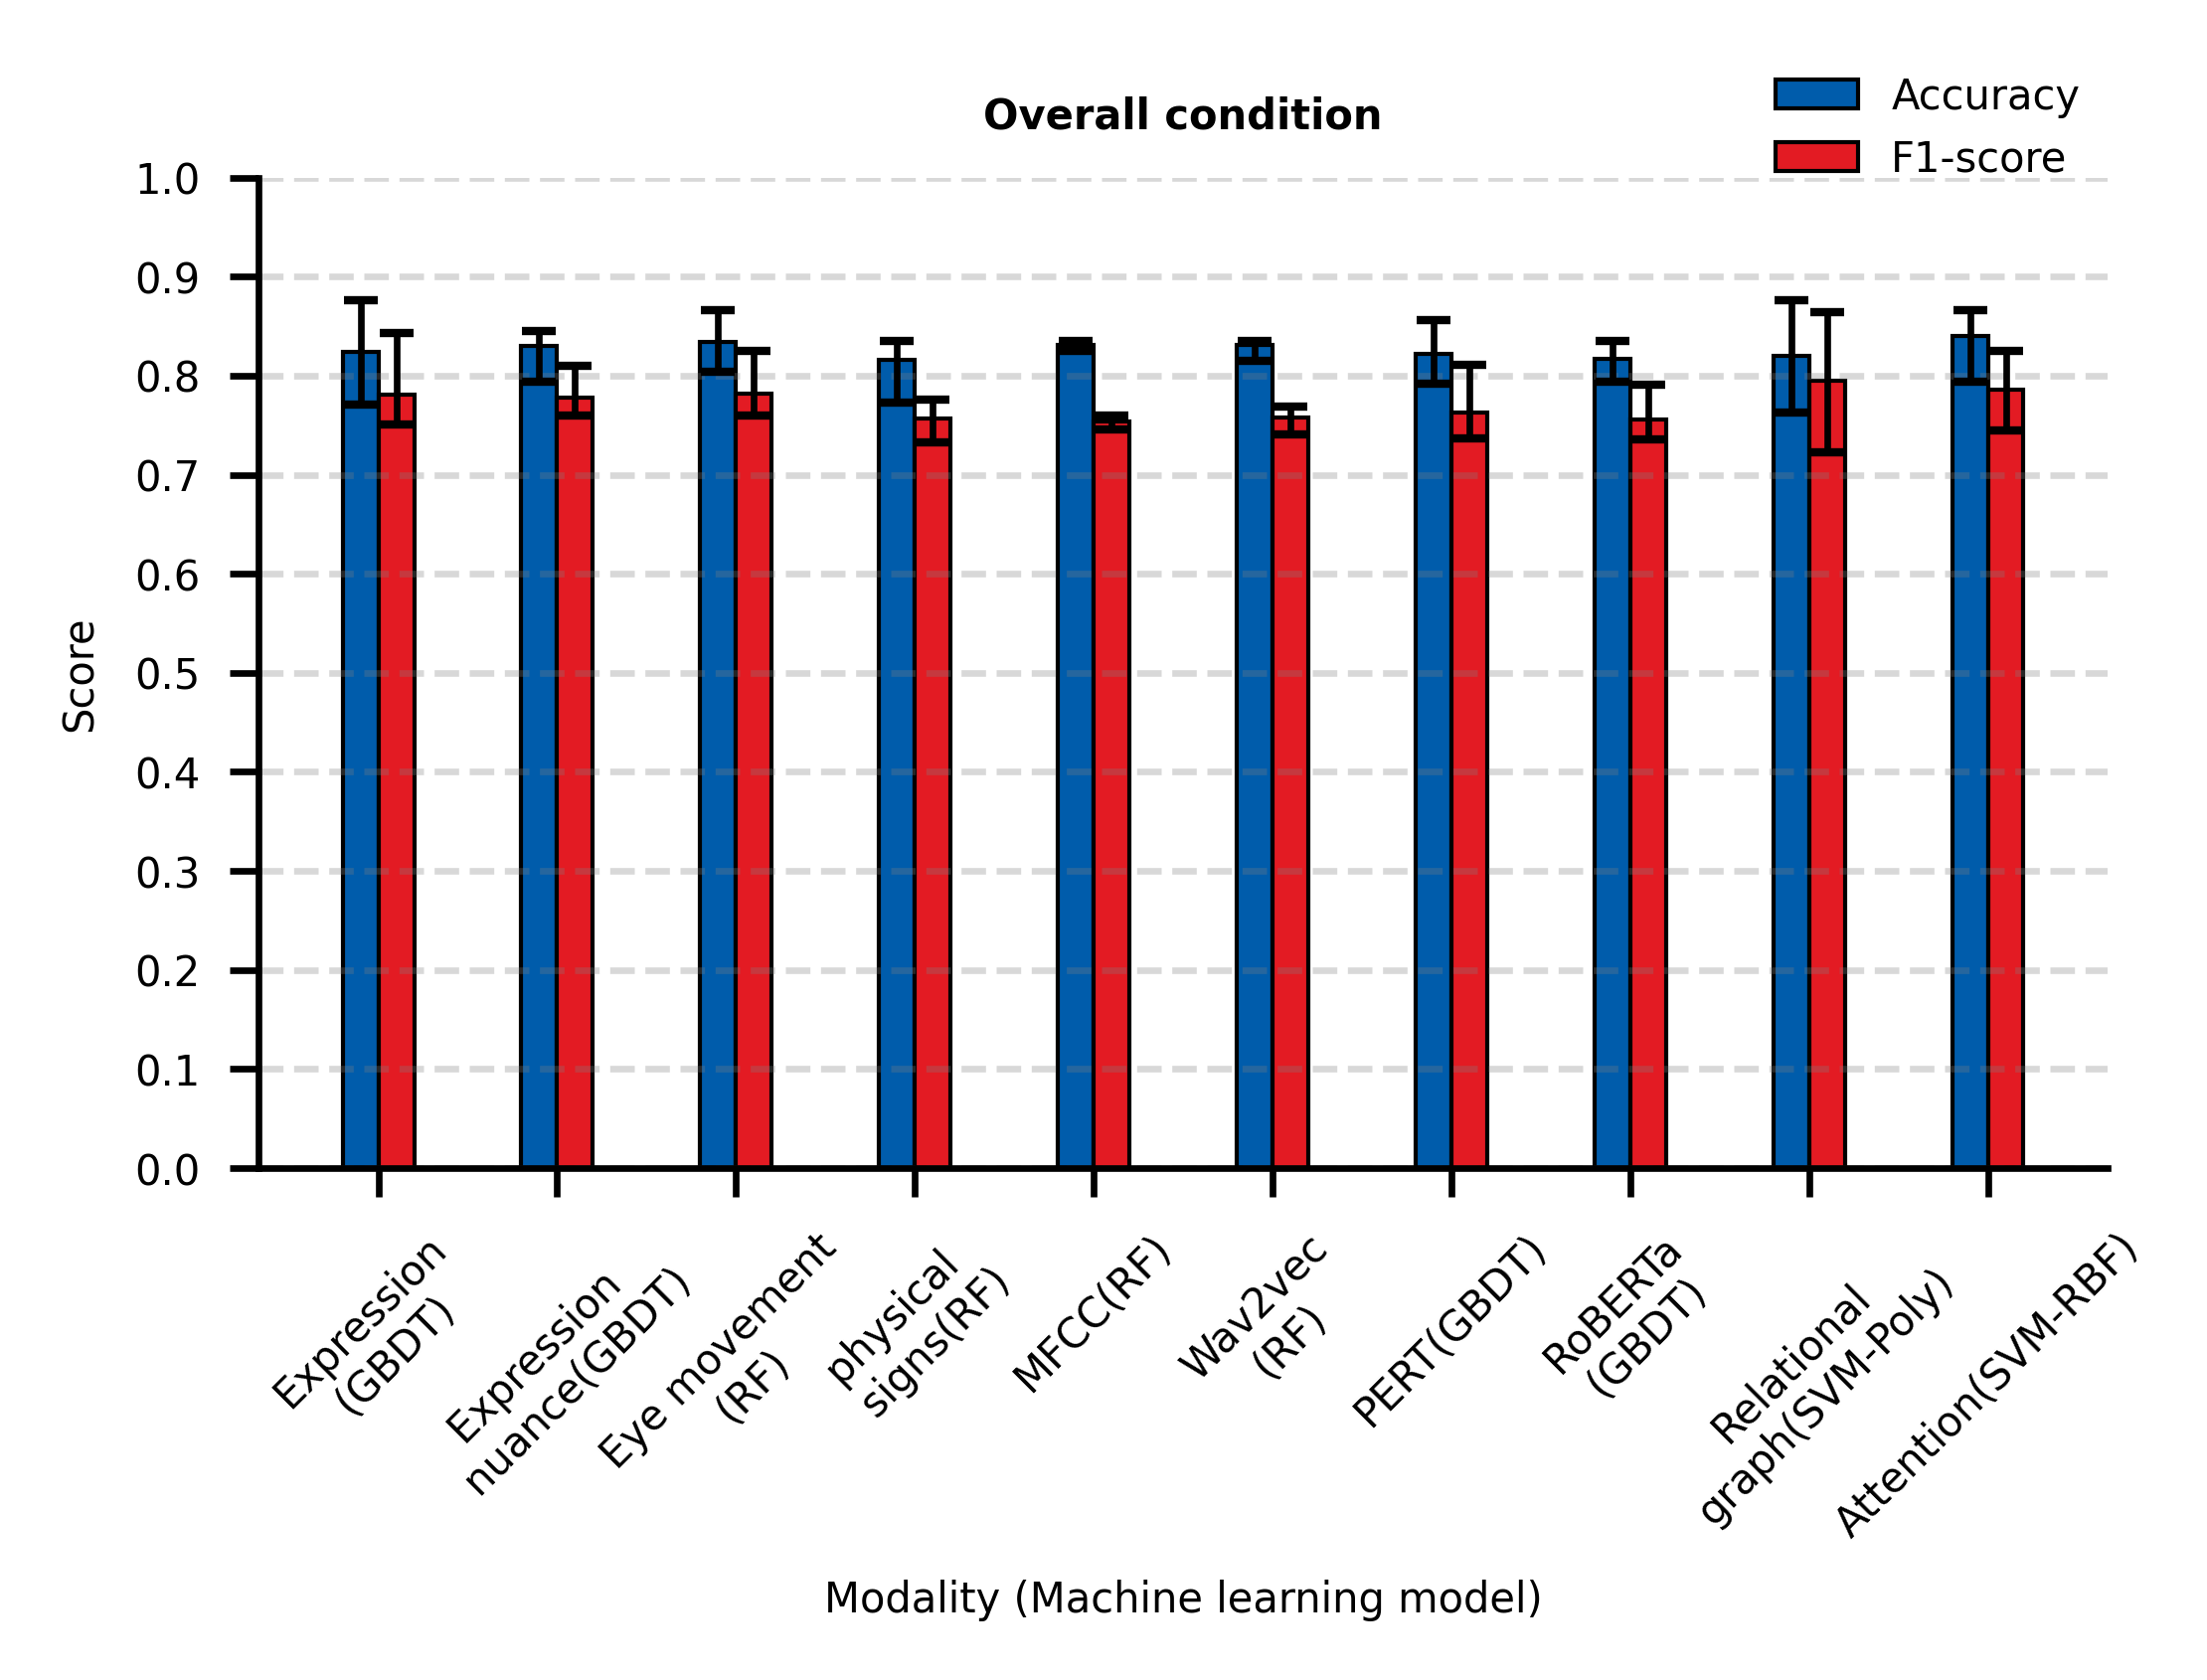

In [274]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(GBDT)', 'Expression \n nuance(GBDT)', 'Eye movement\n(RF)', 'physical \n signs(RF)', \
    'MFCC(RF)', 'Wav2vec\n(RF)',  'PERT(GBDT)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(SVM-Poly)', 'Attention(SVM-RBF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.2), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Overall condition", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(0.8,0.96))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2a.png', bbox_inches='tight')
plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

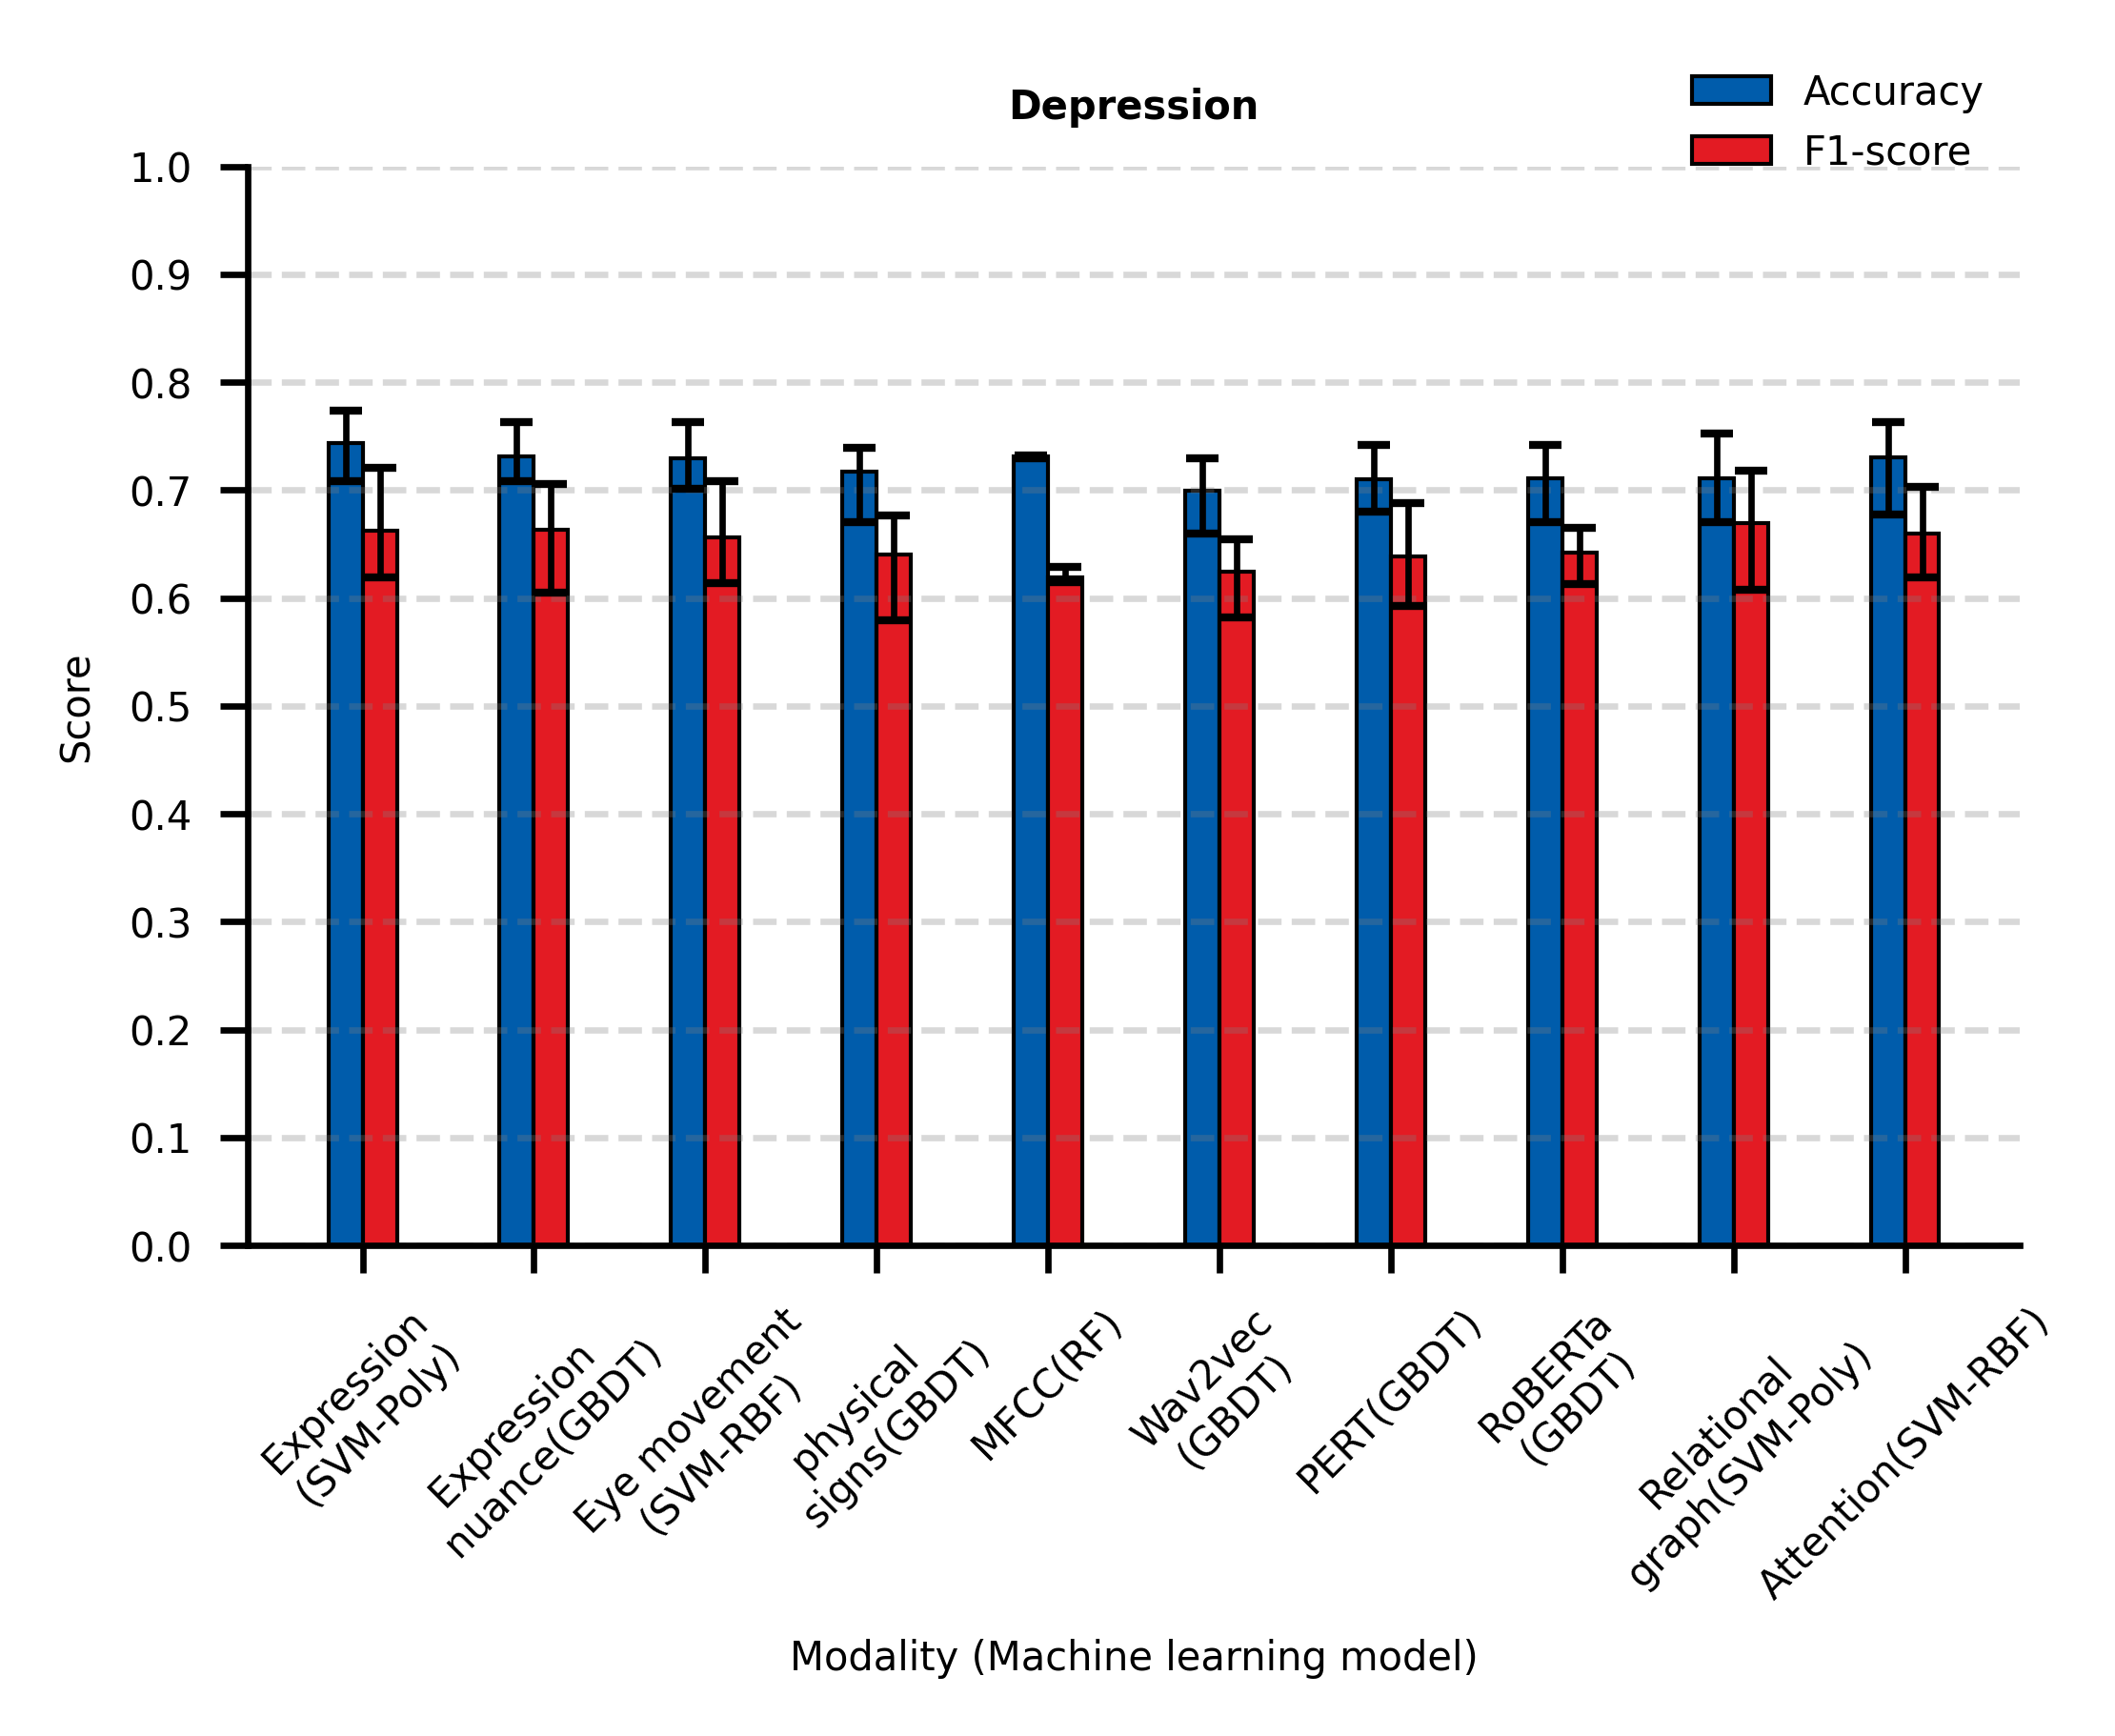

In [167]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-Poly)', 'Expression \n nuance(GBDT)', 'Eye movement\n(SVM-RBF)', 'physical \n signs(GBDT)', \
    'MFCC(RF)', 'Wav2vec\n(GBDT)',  'PERT(GBDT)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(SVM-Poly)', 'Attention(SVM-RBF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Depression", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2b.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

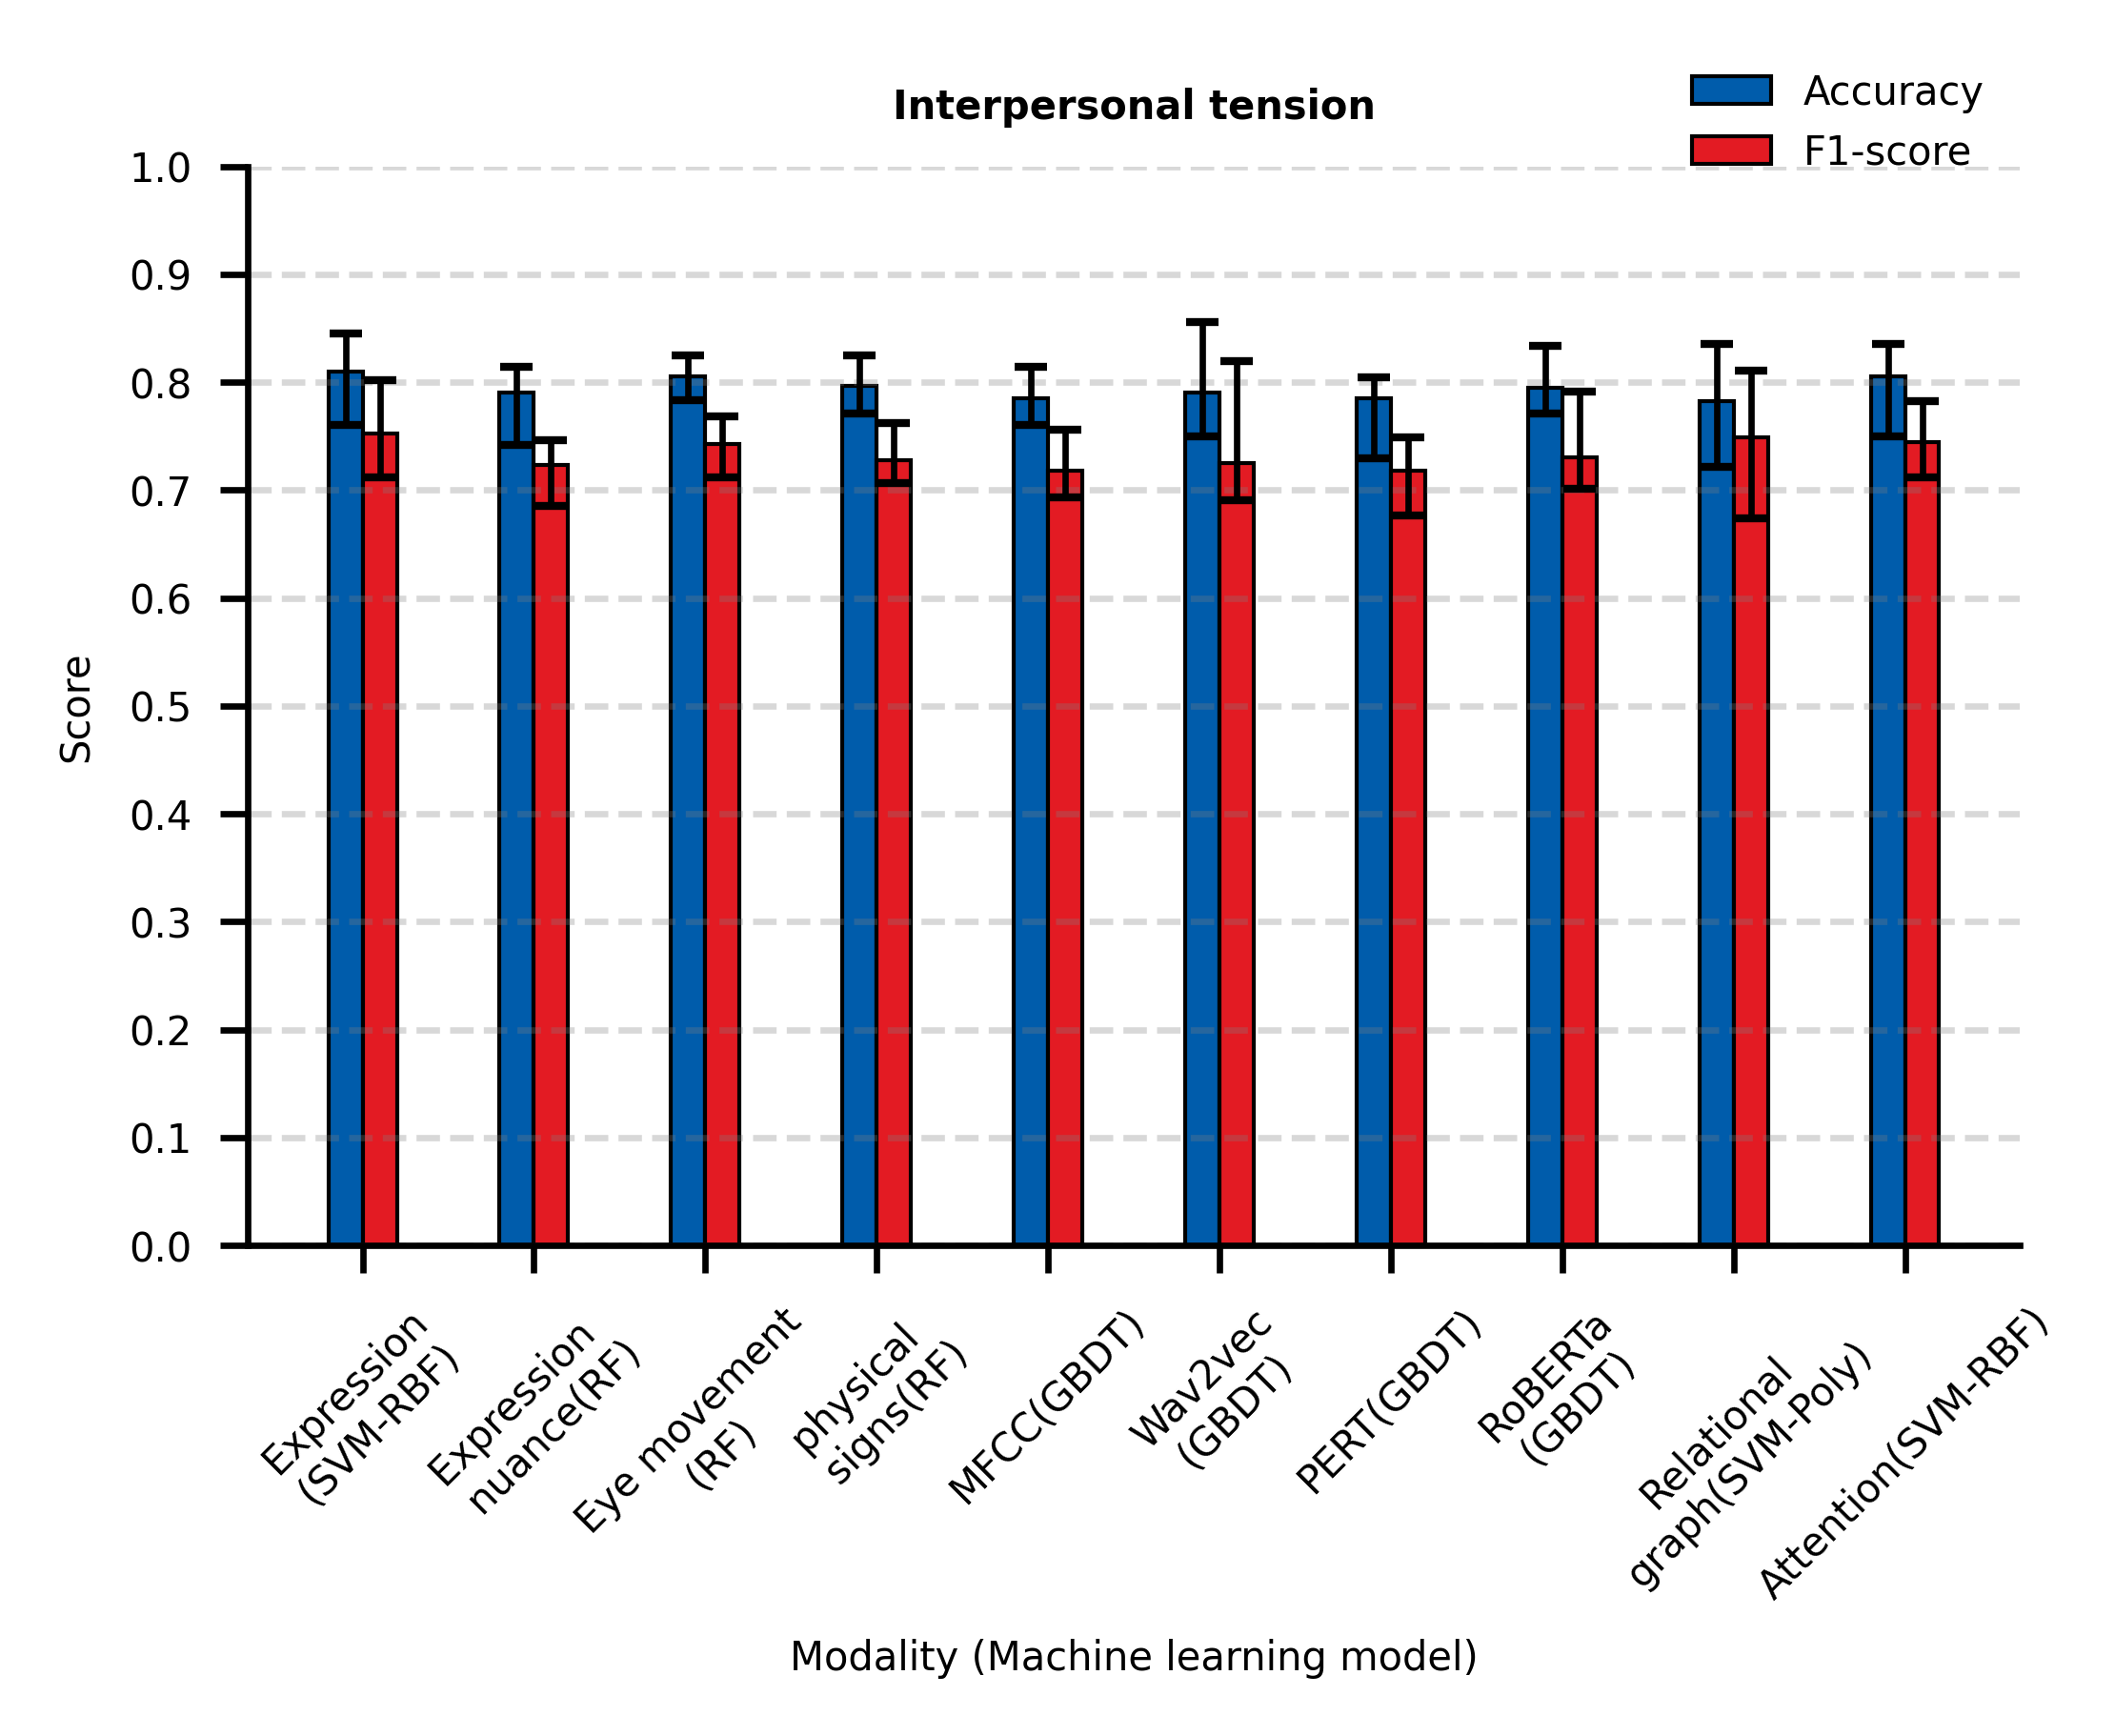

In [169]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-RBF)', 'Expression \n nuance(RF)', 'Eye movement\n(RF)', 'physical \n signs(RF)', \
    'MFCC(GBDT)', 'Wav2vec\n(GBDT)',  'PERT(GBDT)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(SVM-Poly)', 'Attention(SVM-RBF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Interpersonal tension", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2c.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

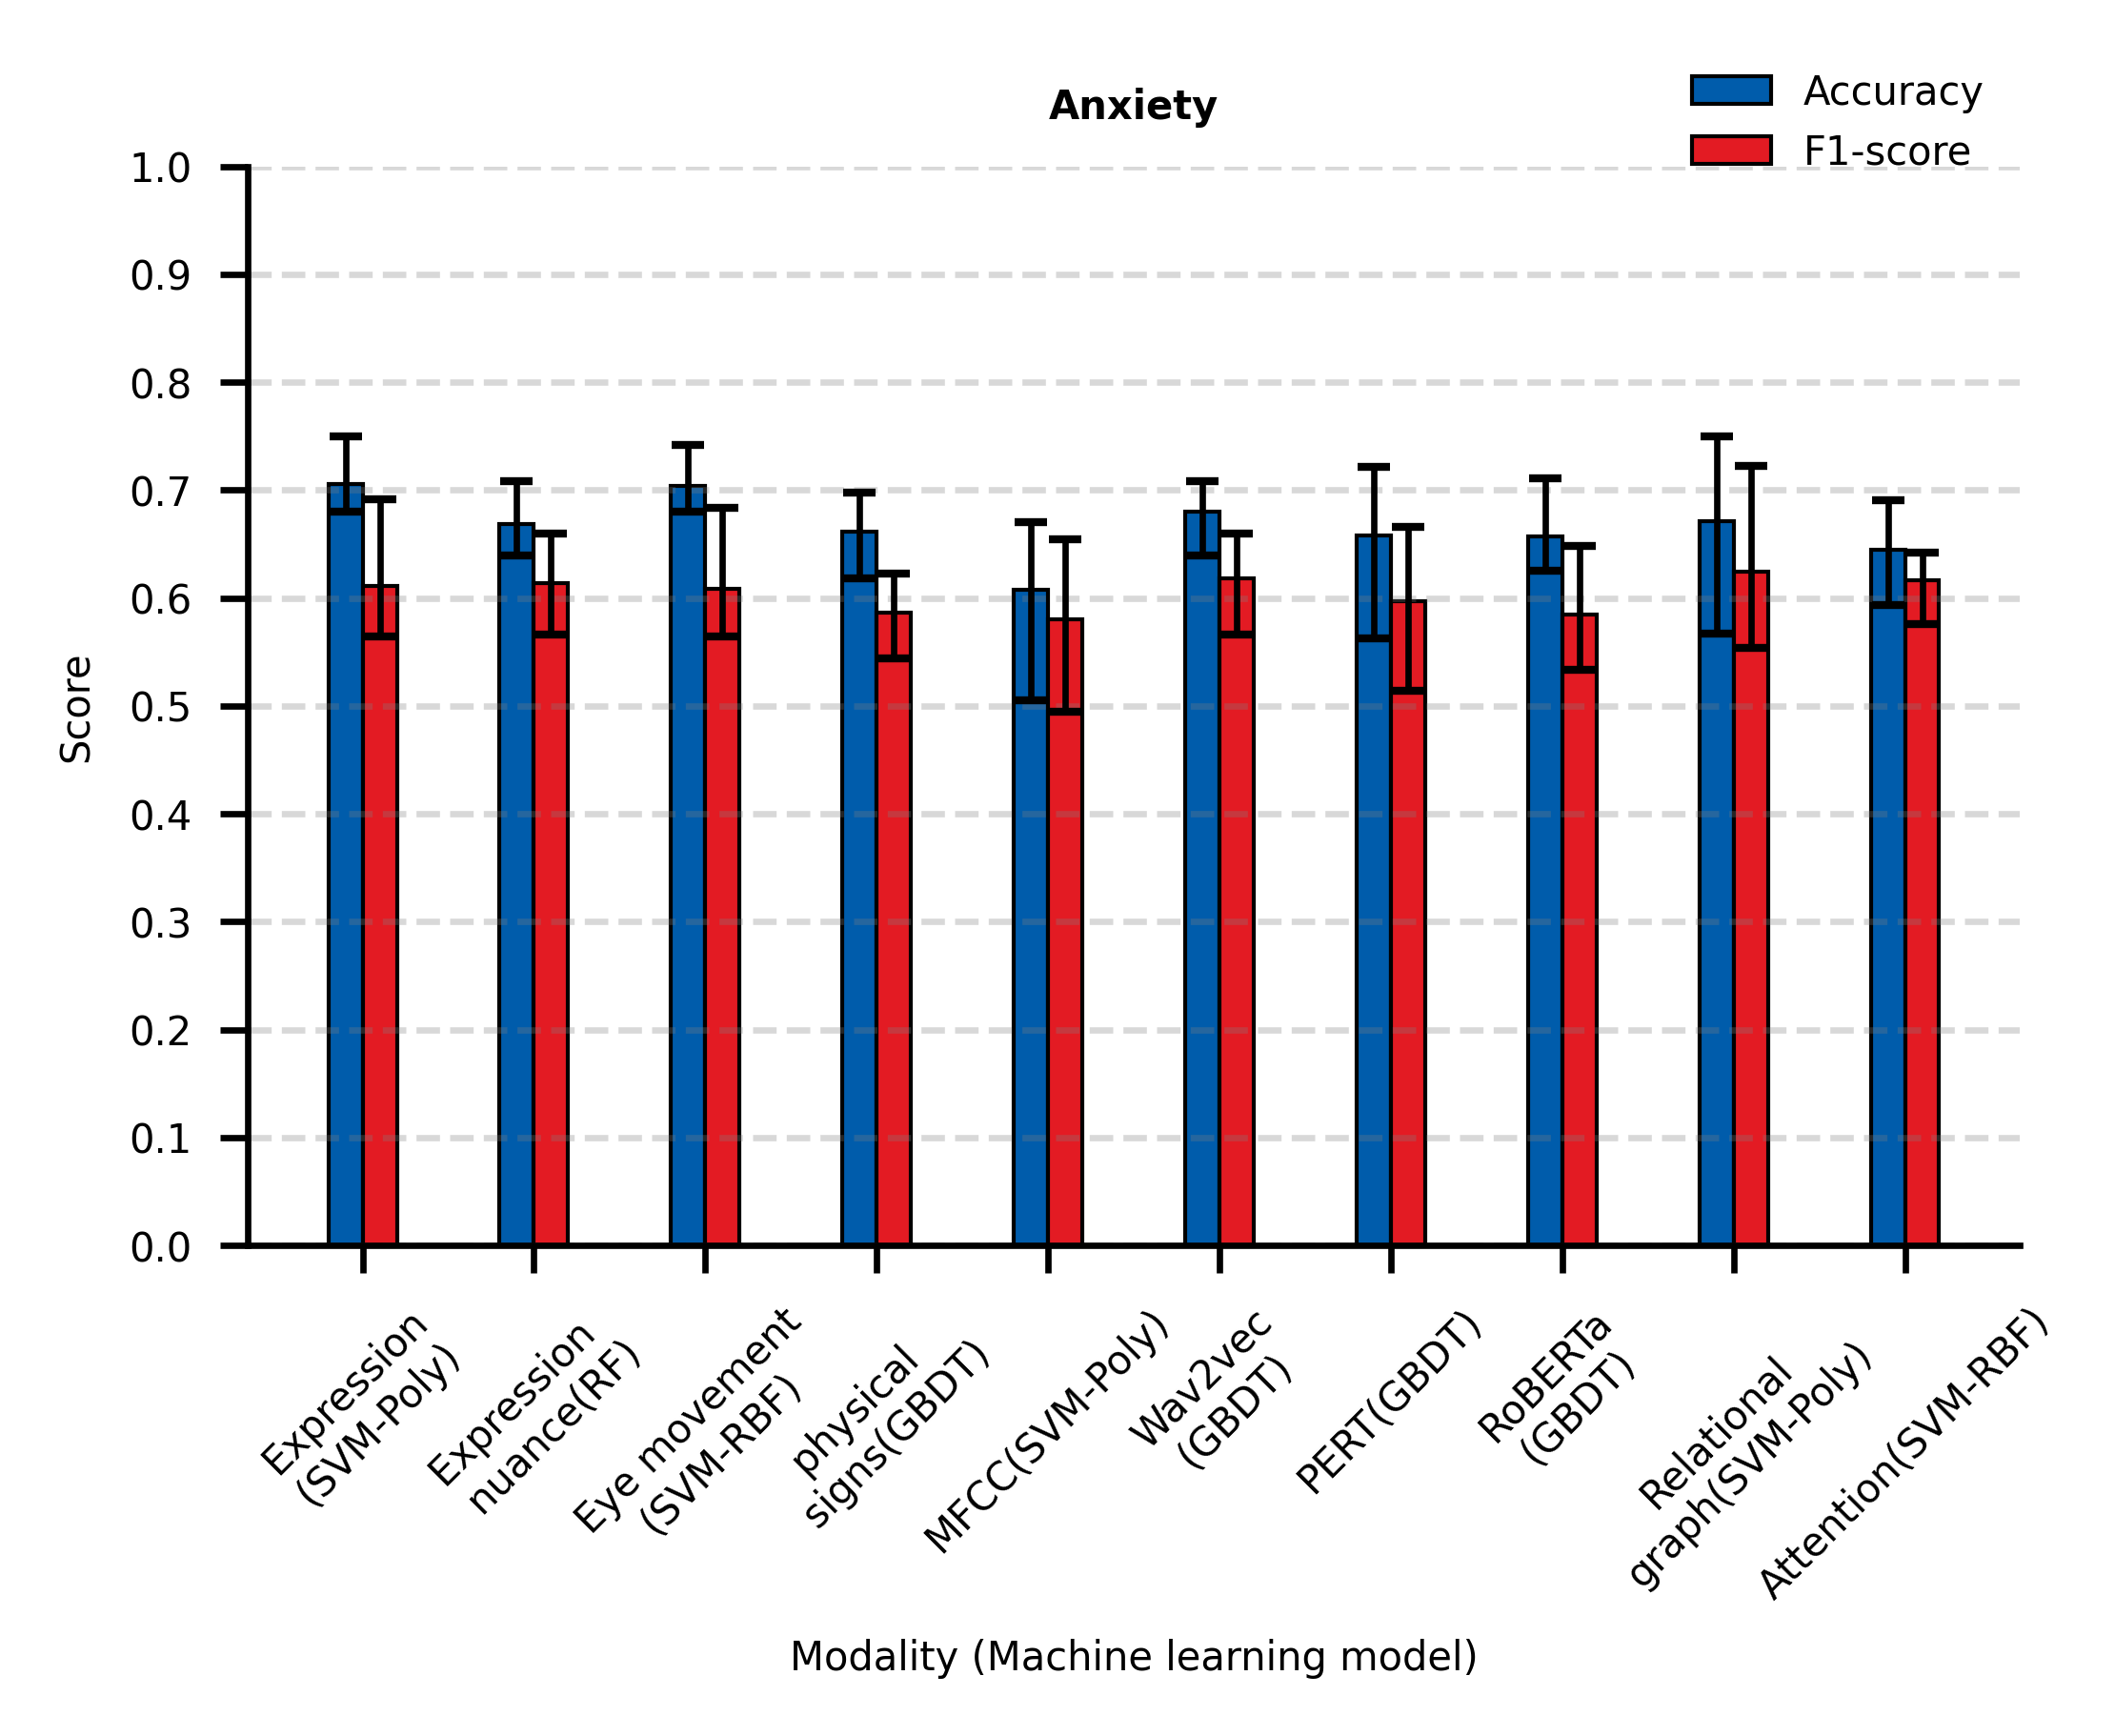

In [173]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-Poly)', 'Expression \n nuance(RF)', 'Eye movement\n(SVM-RBF)', 'physical \n signs(GBDT)', \
    'MFCC(SVM-Poly)', 'Wav2vec\n(GBDT)',  'PERT(GBDT)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(SVM-Poly)', 'Attention(SVM-RBF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Anxiety", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2d.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

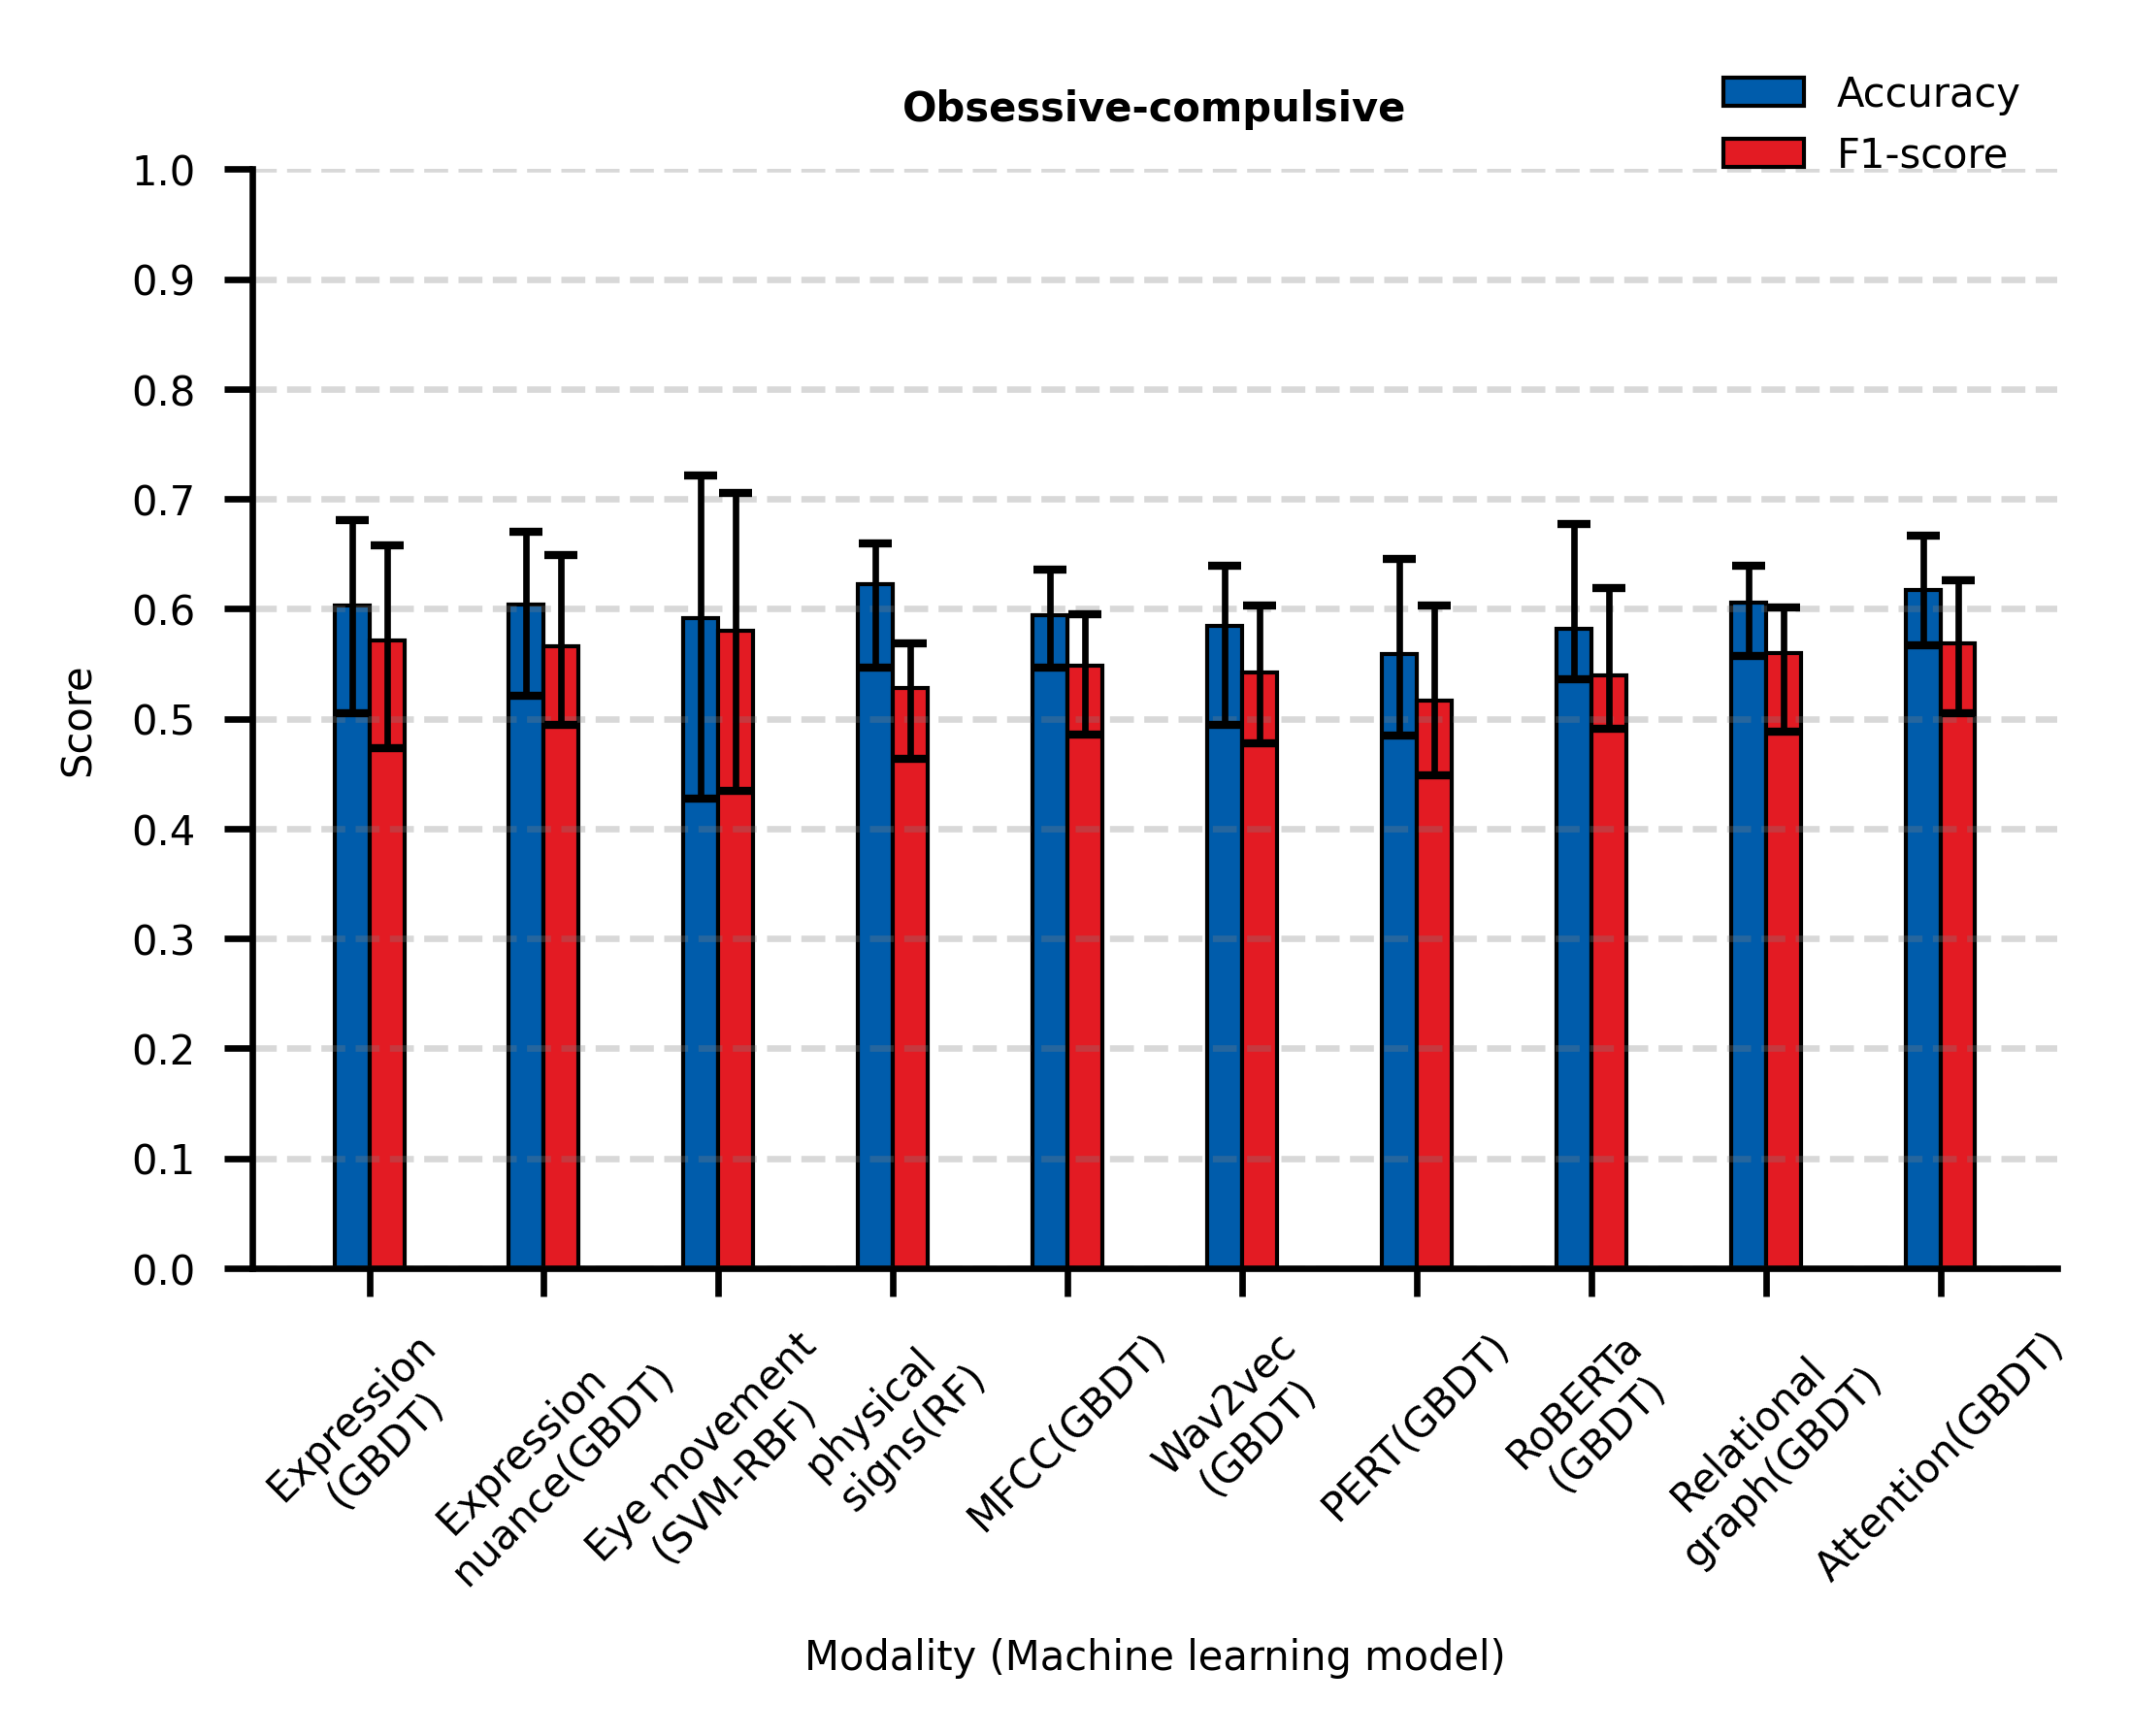

In [176]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(GBDT)', 'Expression \n nuance(GBDT)', 'Eye movement\n(SVM-RBF)', 'physical \n signs(RF)', \
    'MFCC(GBDT)', 'Wav2vec\n(GBDT)',  'PERT(GBDT)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(GBDT)', 'Attention(GBDT)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Obsessive-compulsive", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2e.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

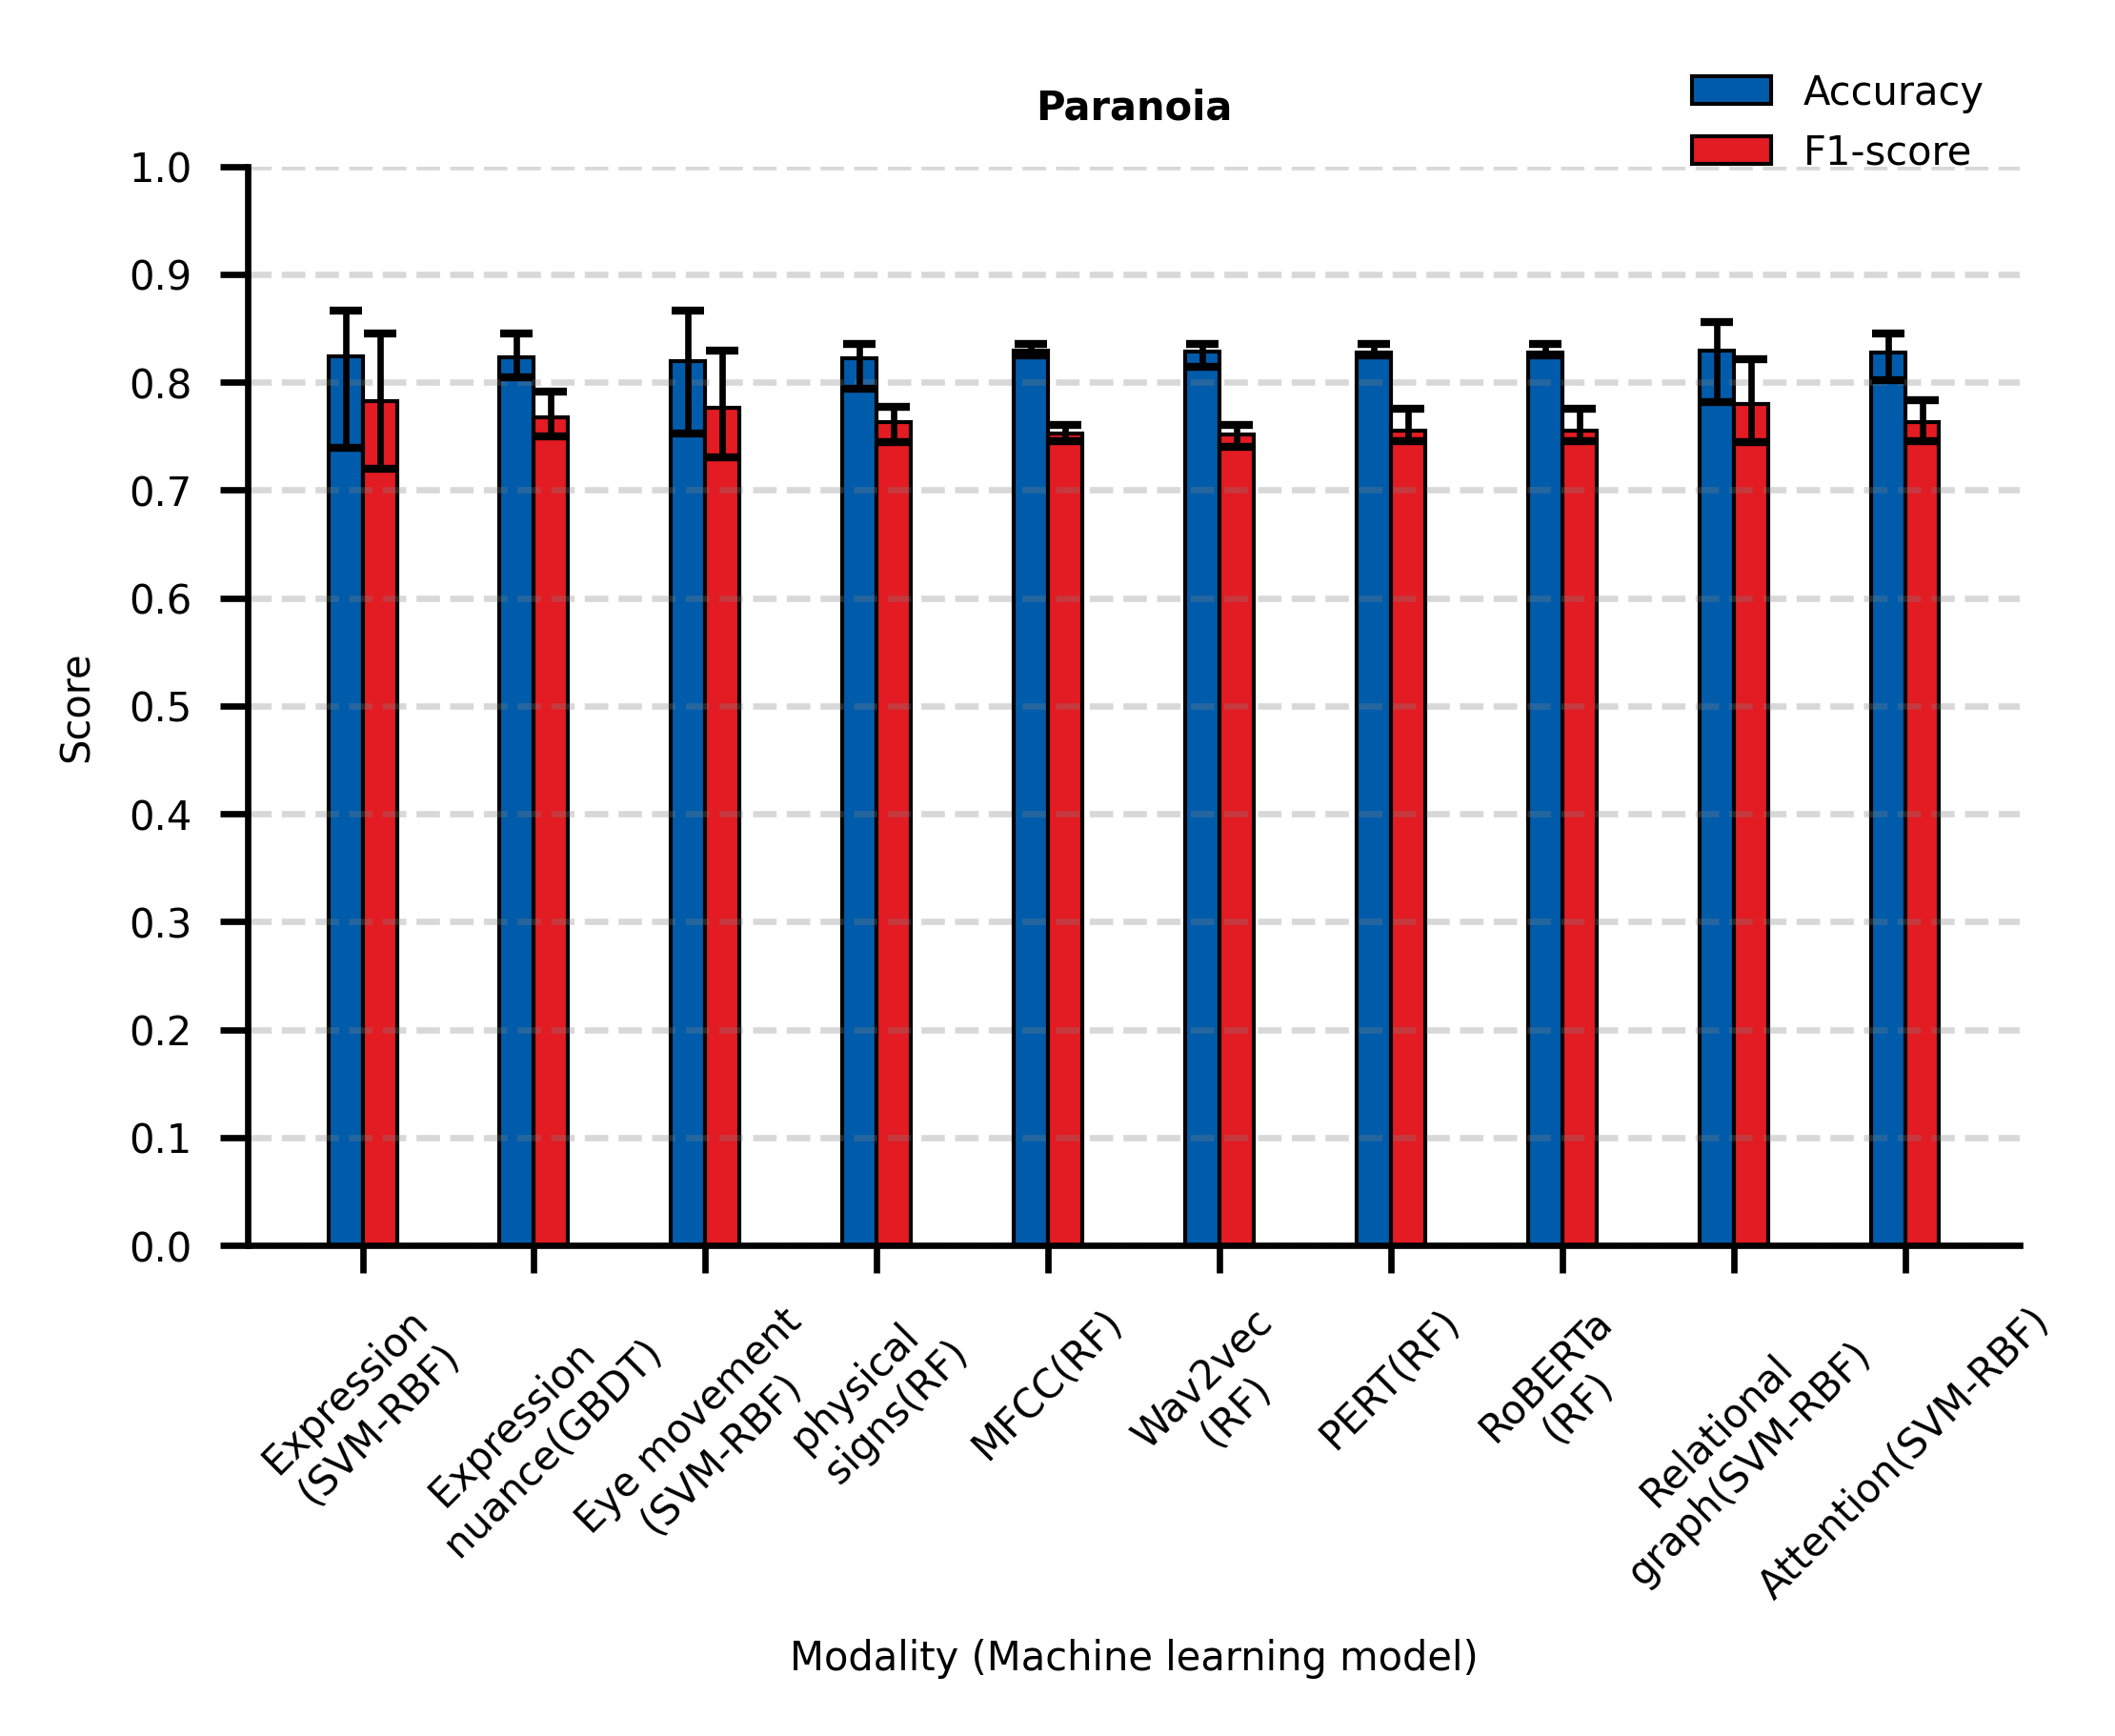

In [179]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-RBF)', 'Expression \n nuance(GBDT)', 'Eye movement\n(SVM-RBF)', 'physical \n signs(RF)', \
    'MFCC(RF)', 'Wav2vec\n(RF)',  'PERT(RF)', 'RoBERTa\n(RF)', 'Relational\ngraph(SVM-RBF)', 'Attention(SVM-RBF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Paranoia", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2f.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

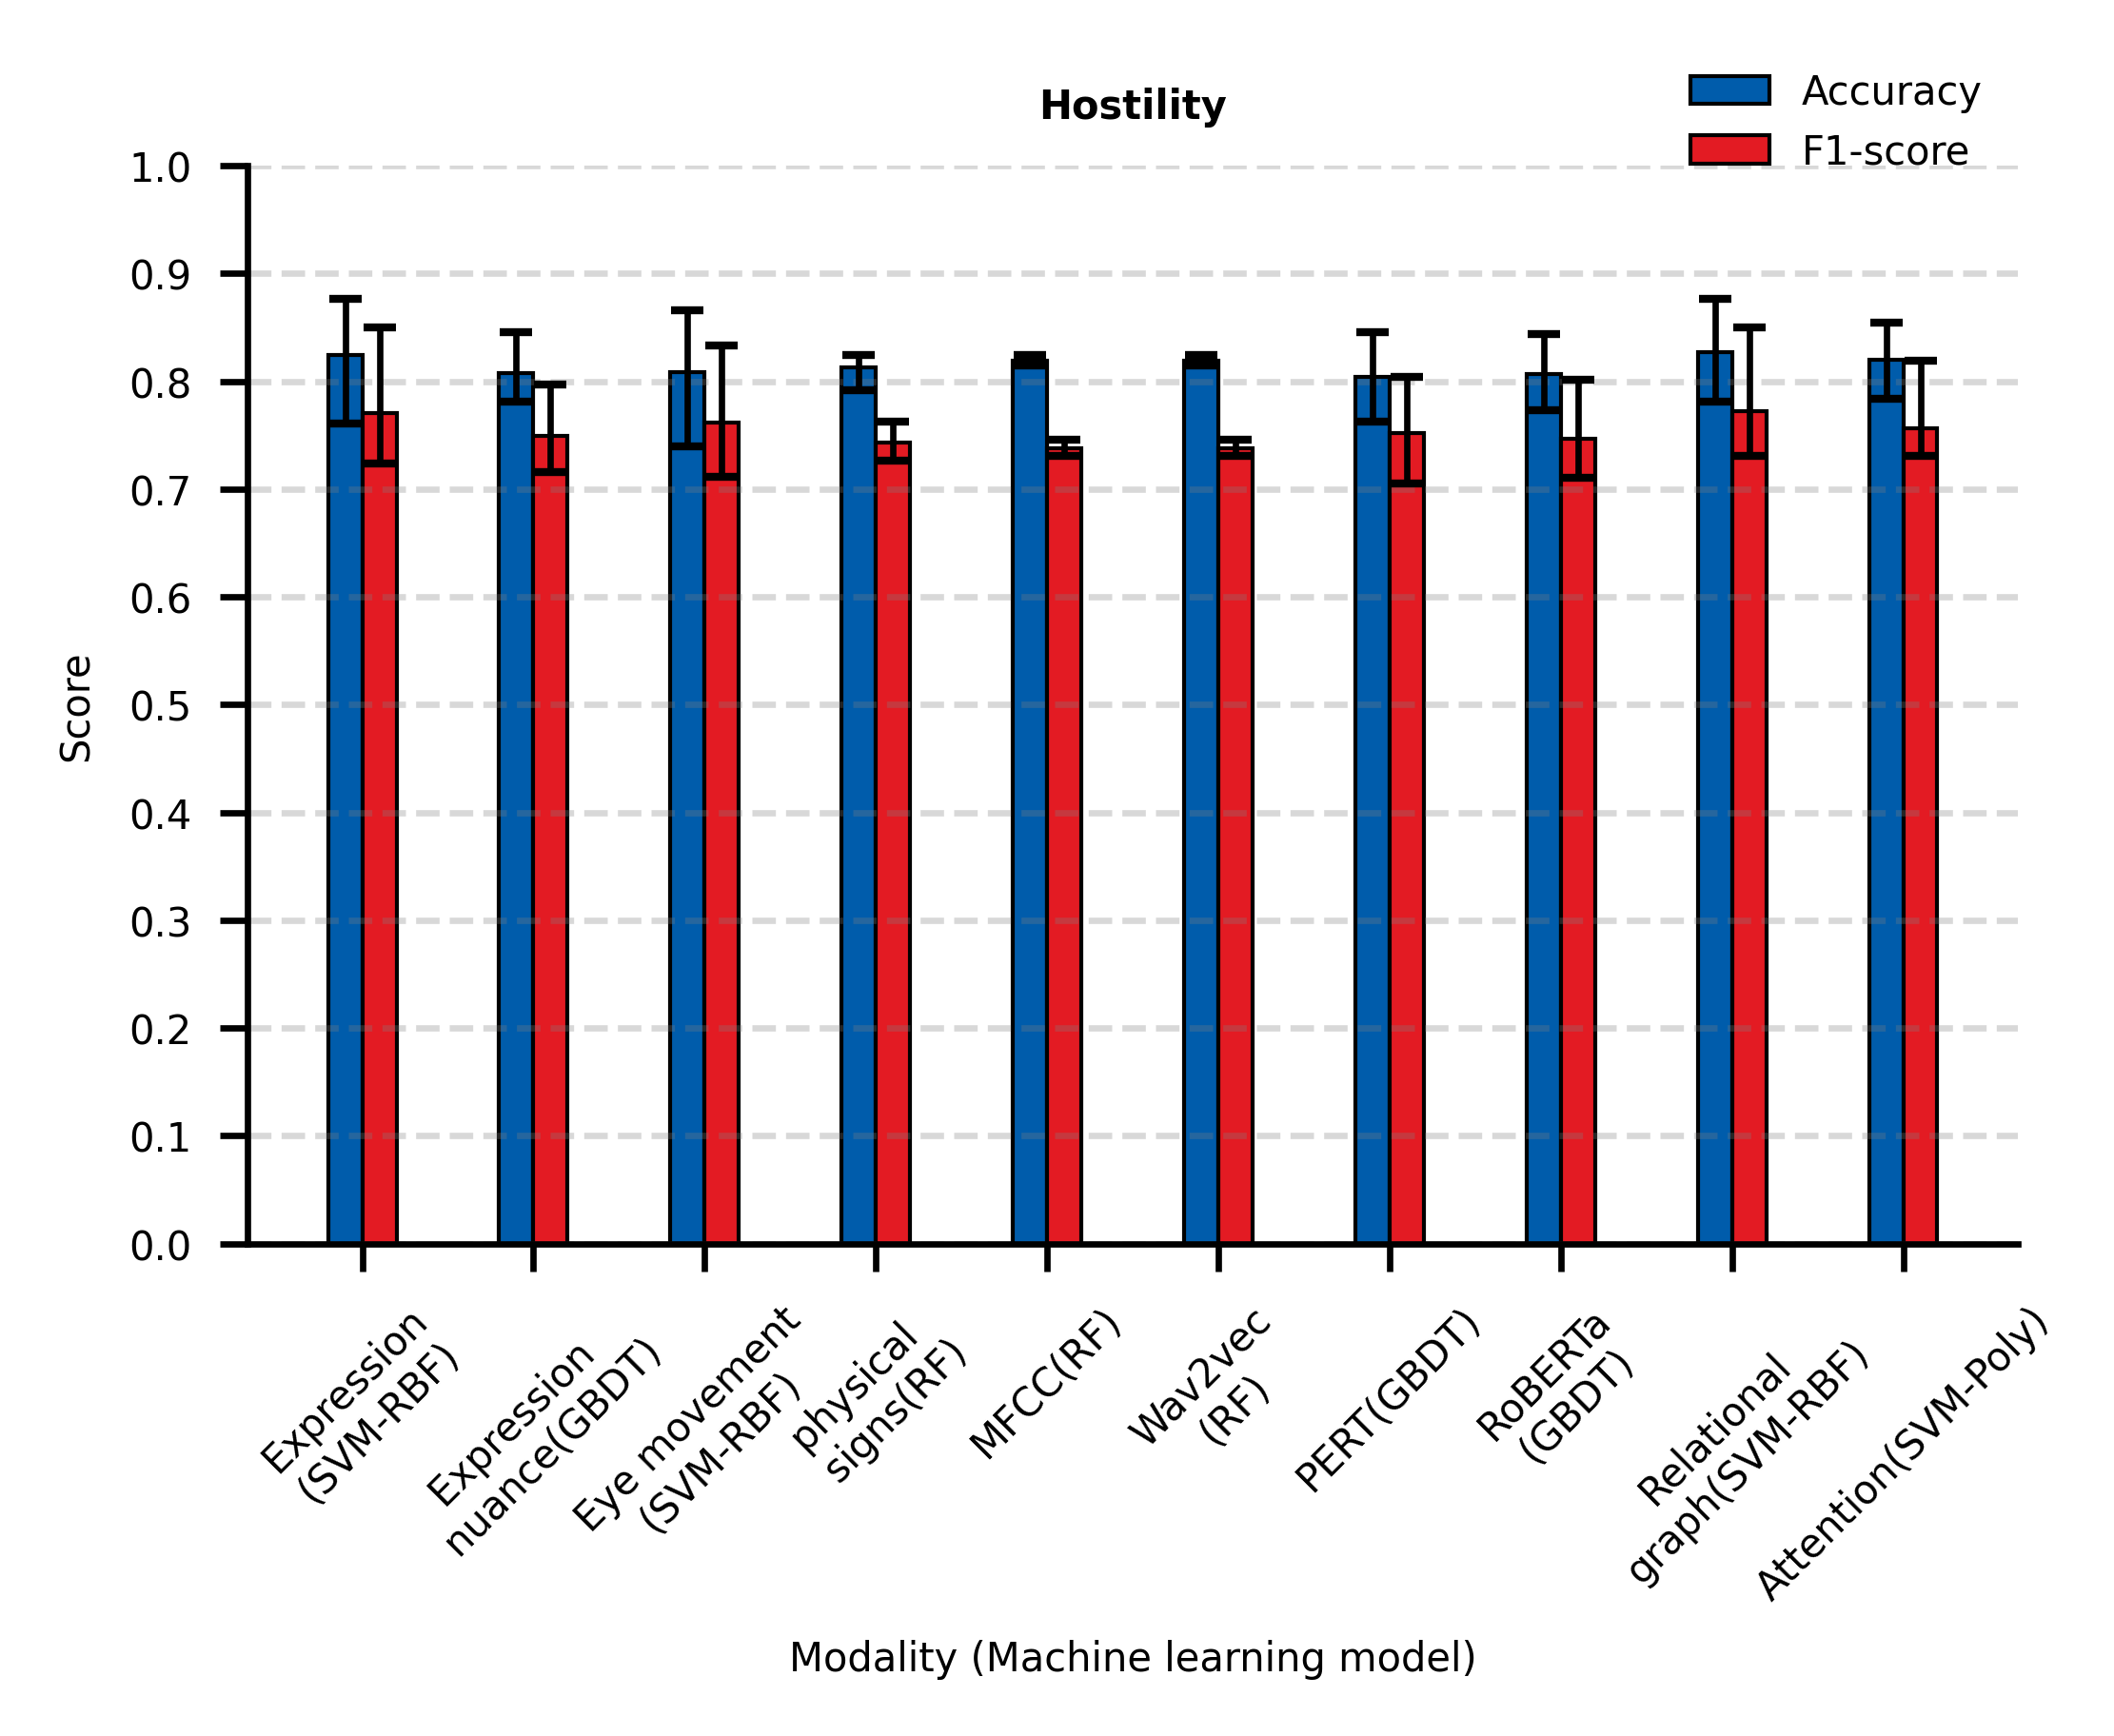

In [181]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-RBF)', 'Expression \n nuance(GBDT)', 'Eye movement\n(SVM-RBF)', 'physical \n signs(RF)', \
    'MFCC(RF)', 'Wav2vec\n(RF)',  'PERT(GBDT)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(SVM-RBF)', 'Attention(SVM-Poly)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Hostility", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2g.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

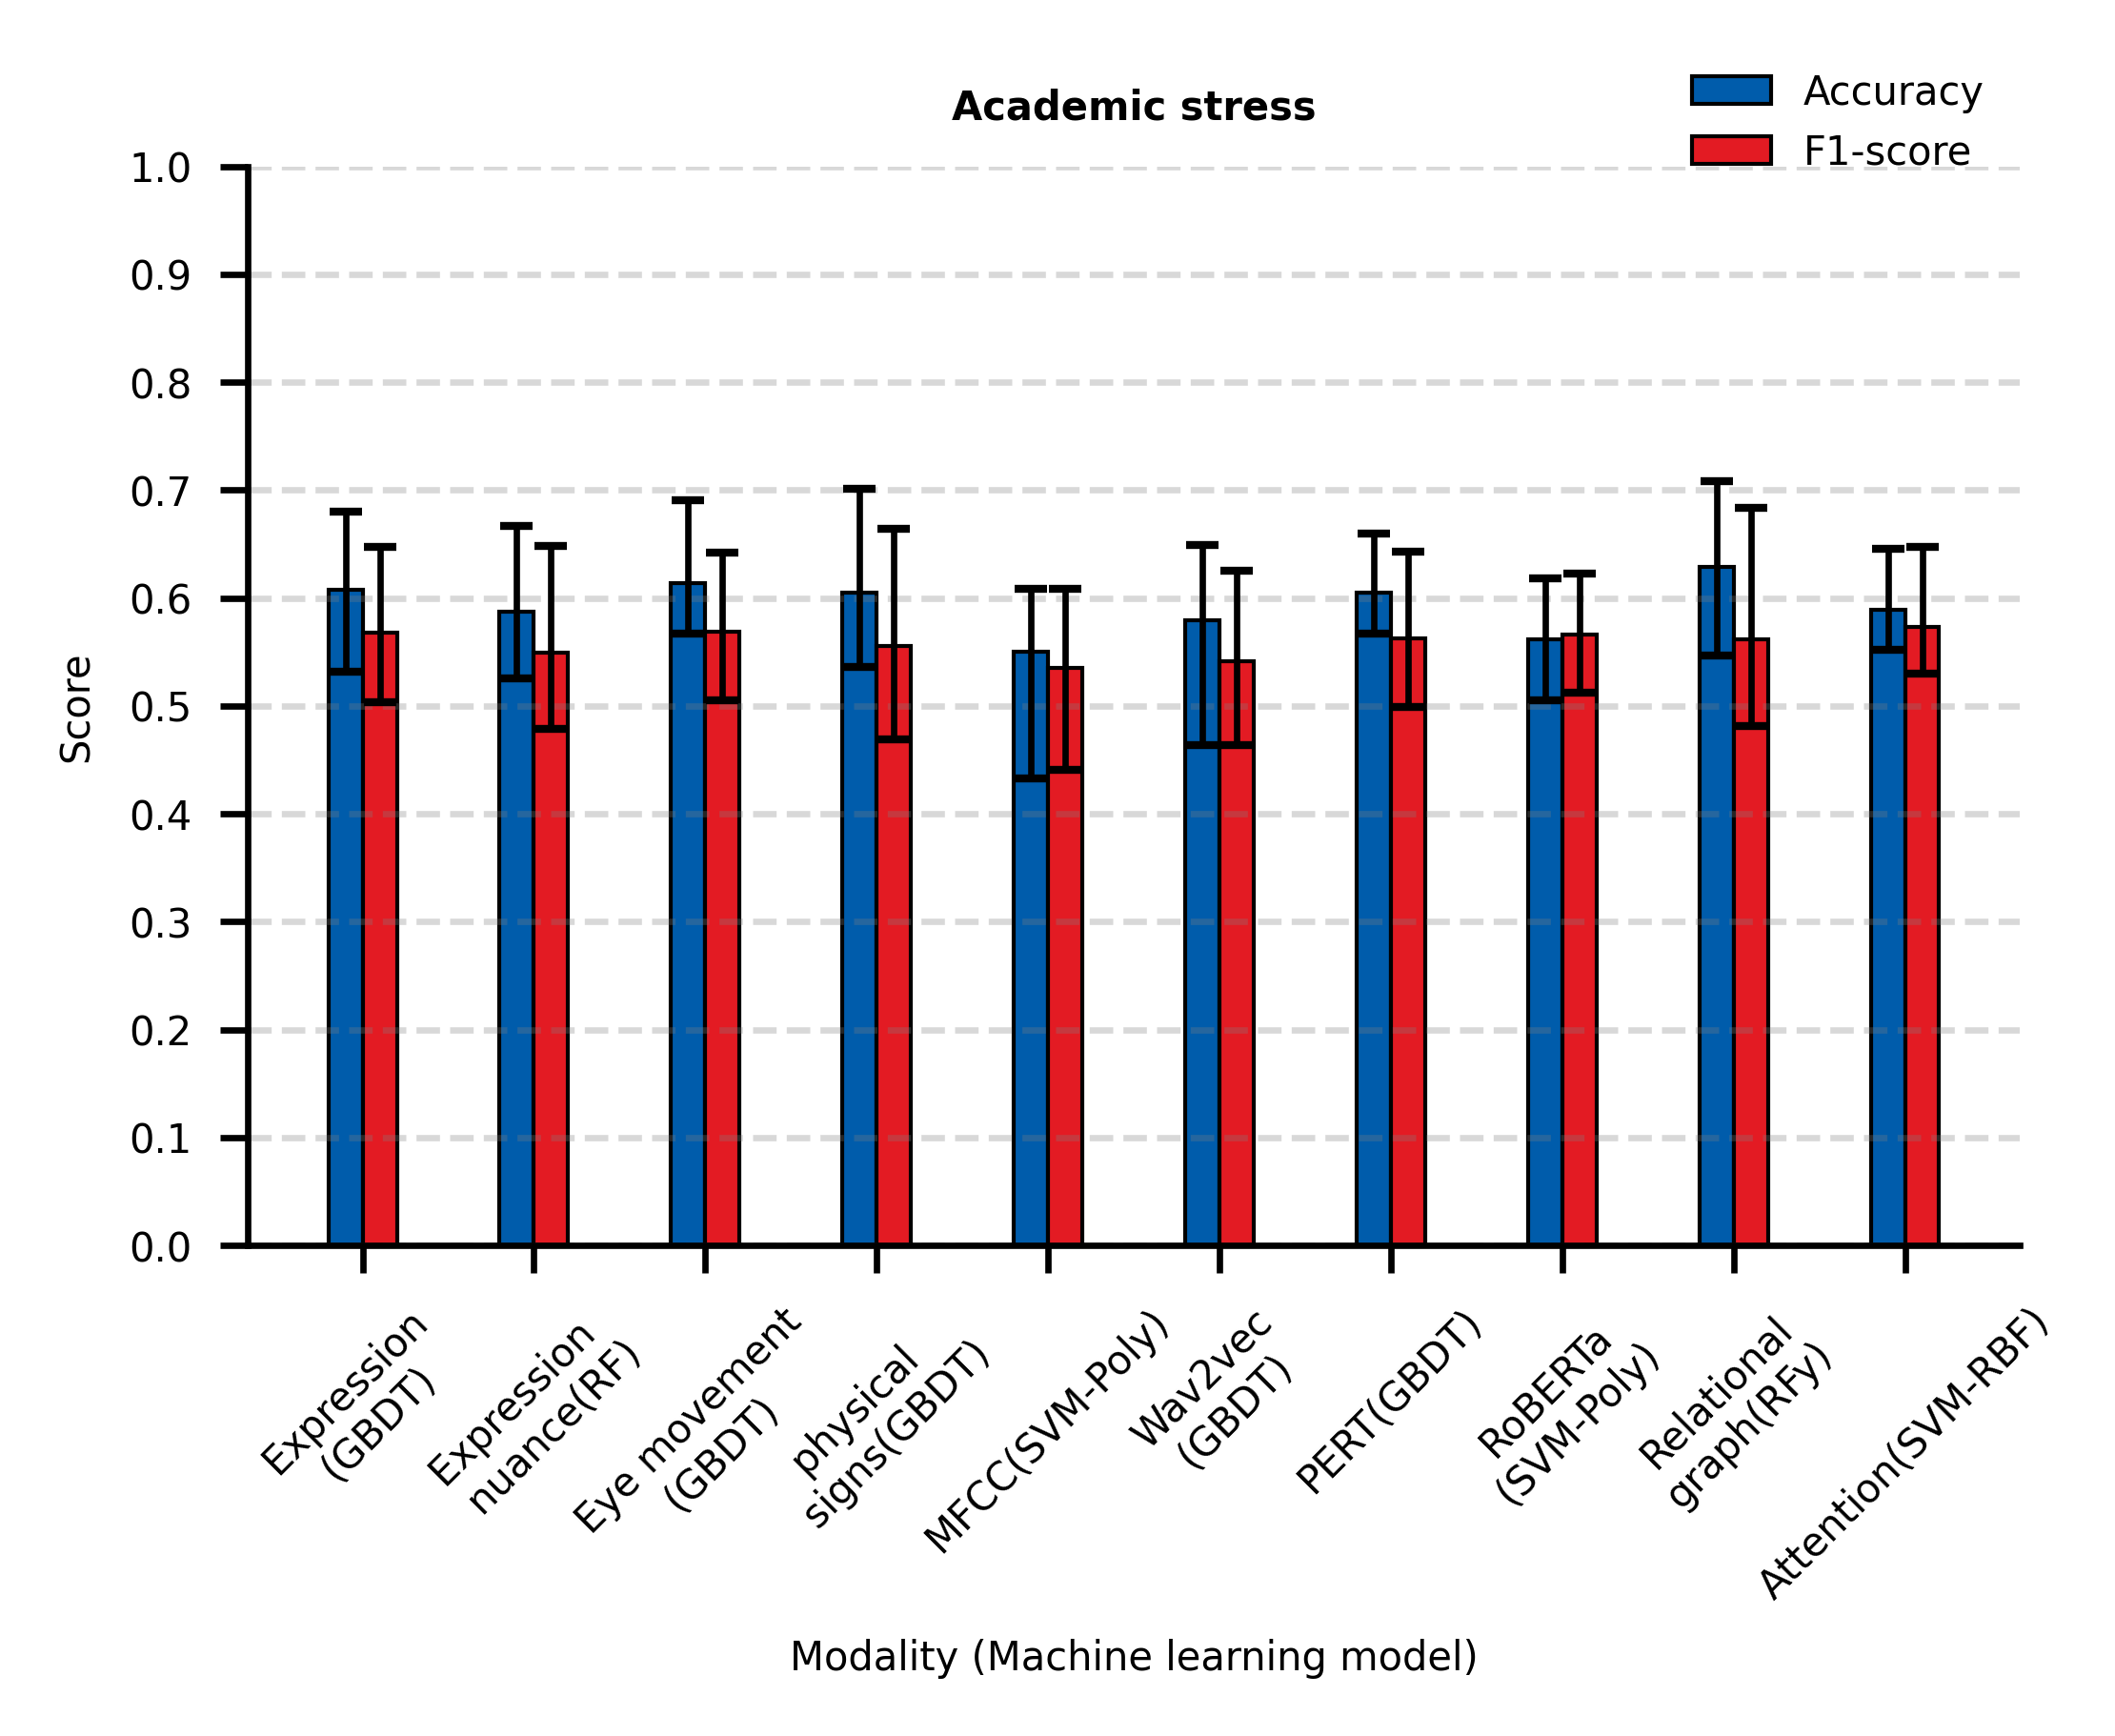

In [184]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(GBDT)', 'Expression \n nuance(RF)', 'Eye movement\n(GBDT)', 'physical \n signs(GBDT)', \
    'MFCC(SVM-Poly)', 'Wav2vec\n(GBDT)',  'PERT(GBDT)', 'RoBERTa\n(SVM-Poly)', 'Relational\ngraph(RFy)', 'Attention(SVM-RBF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Academic stress", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2h.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

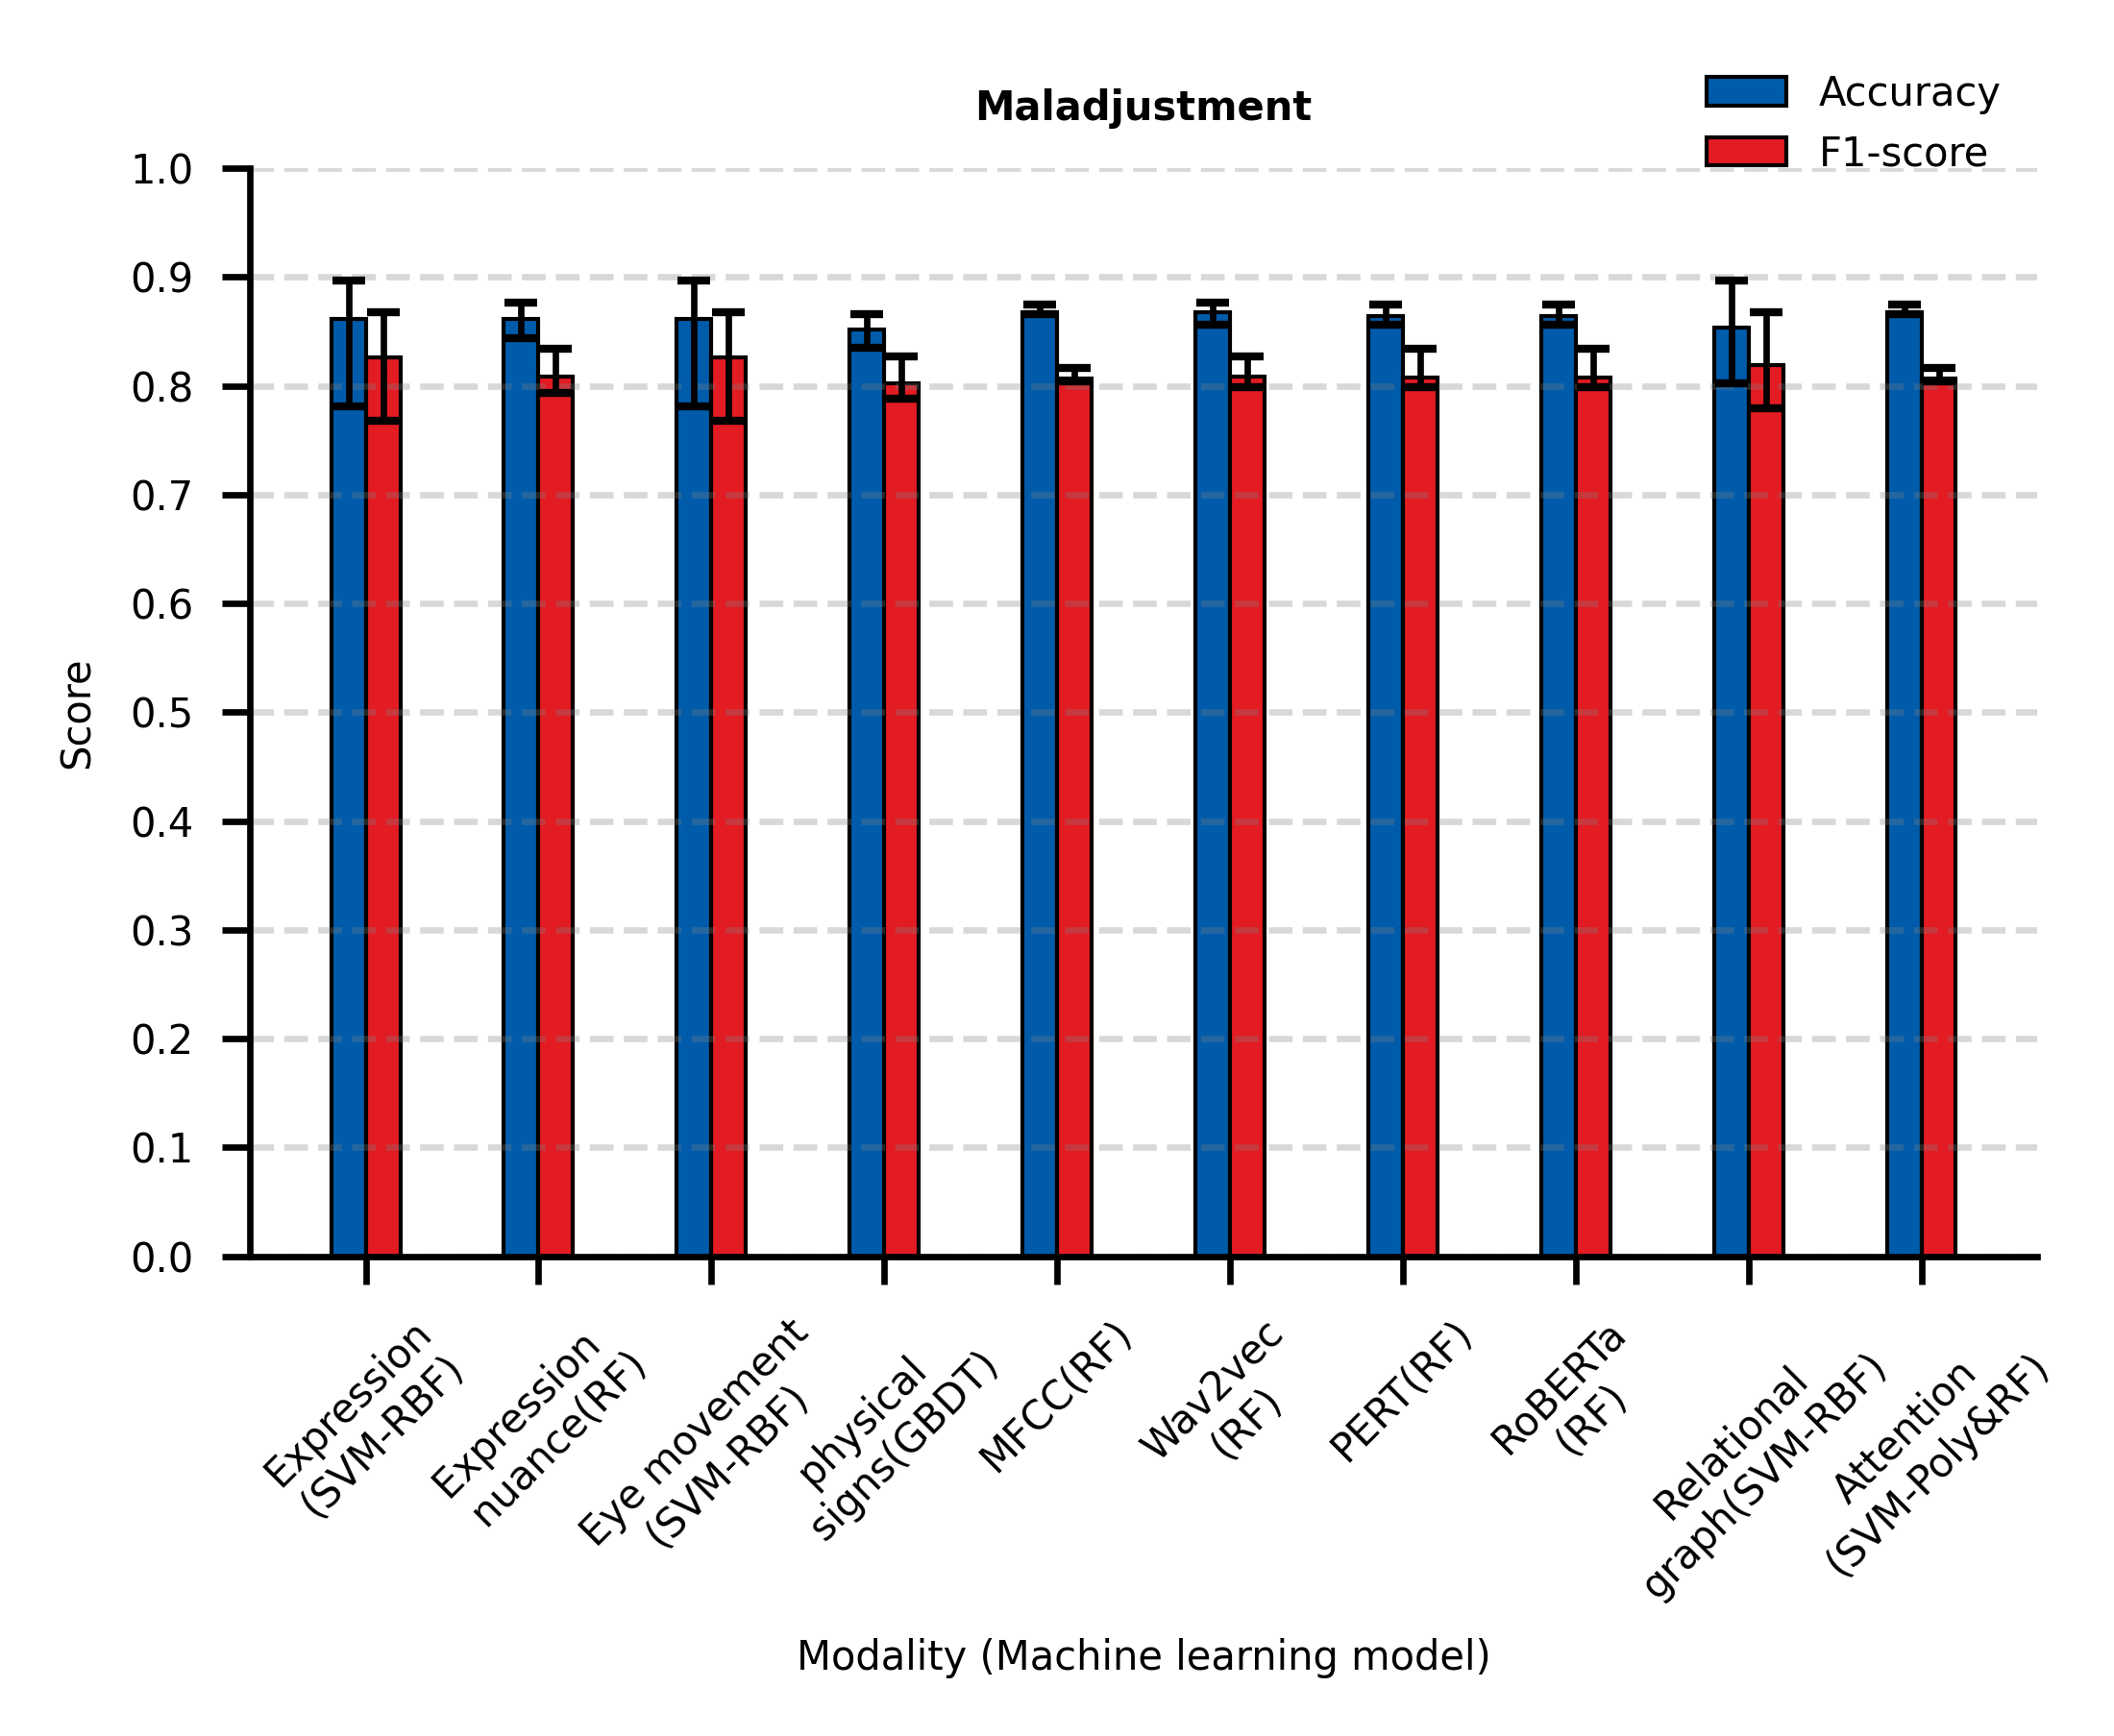

In [187]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-RBF)', 'Expression \n nuance(RF)', 'Eye movement\n(SVM-RBF)', 'physical \n signs(GBDT)', \
    'MFCC(RF)', 'Wav2vec\n(RF)',  'PERT(RF)', 'RoBERTa\n(RF)', 'Relational\ngraph(SVM-RBF)', 'Attention\n(SVM-Poly&RF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Maladjustment", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2i.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

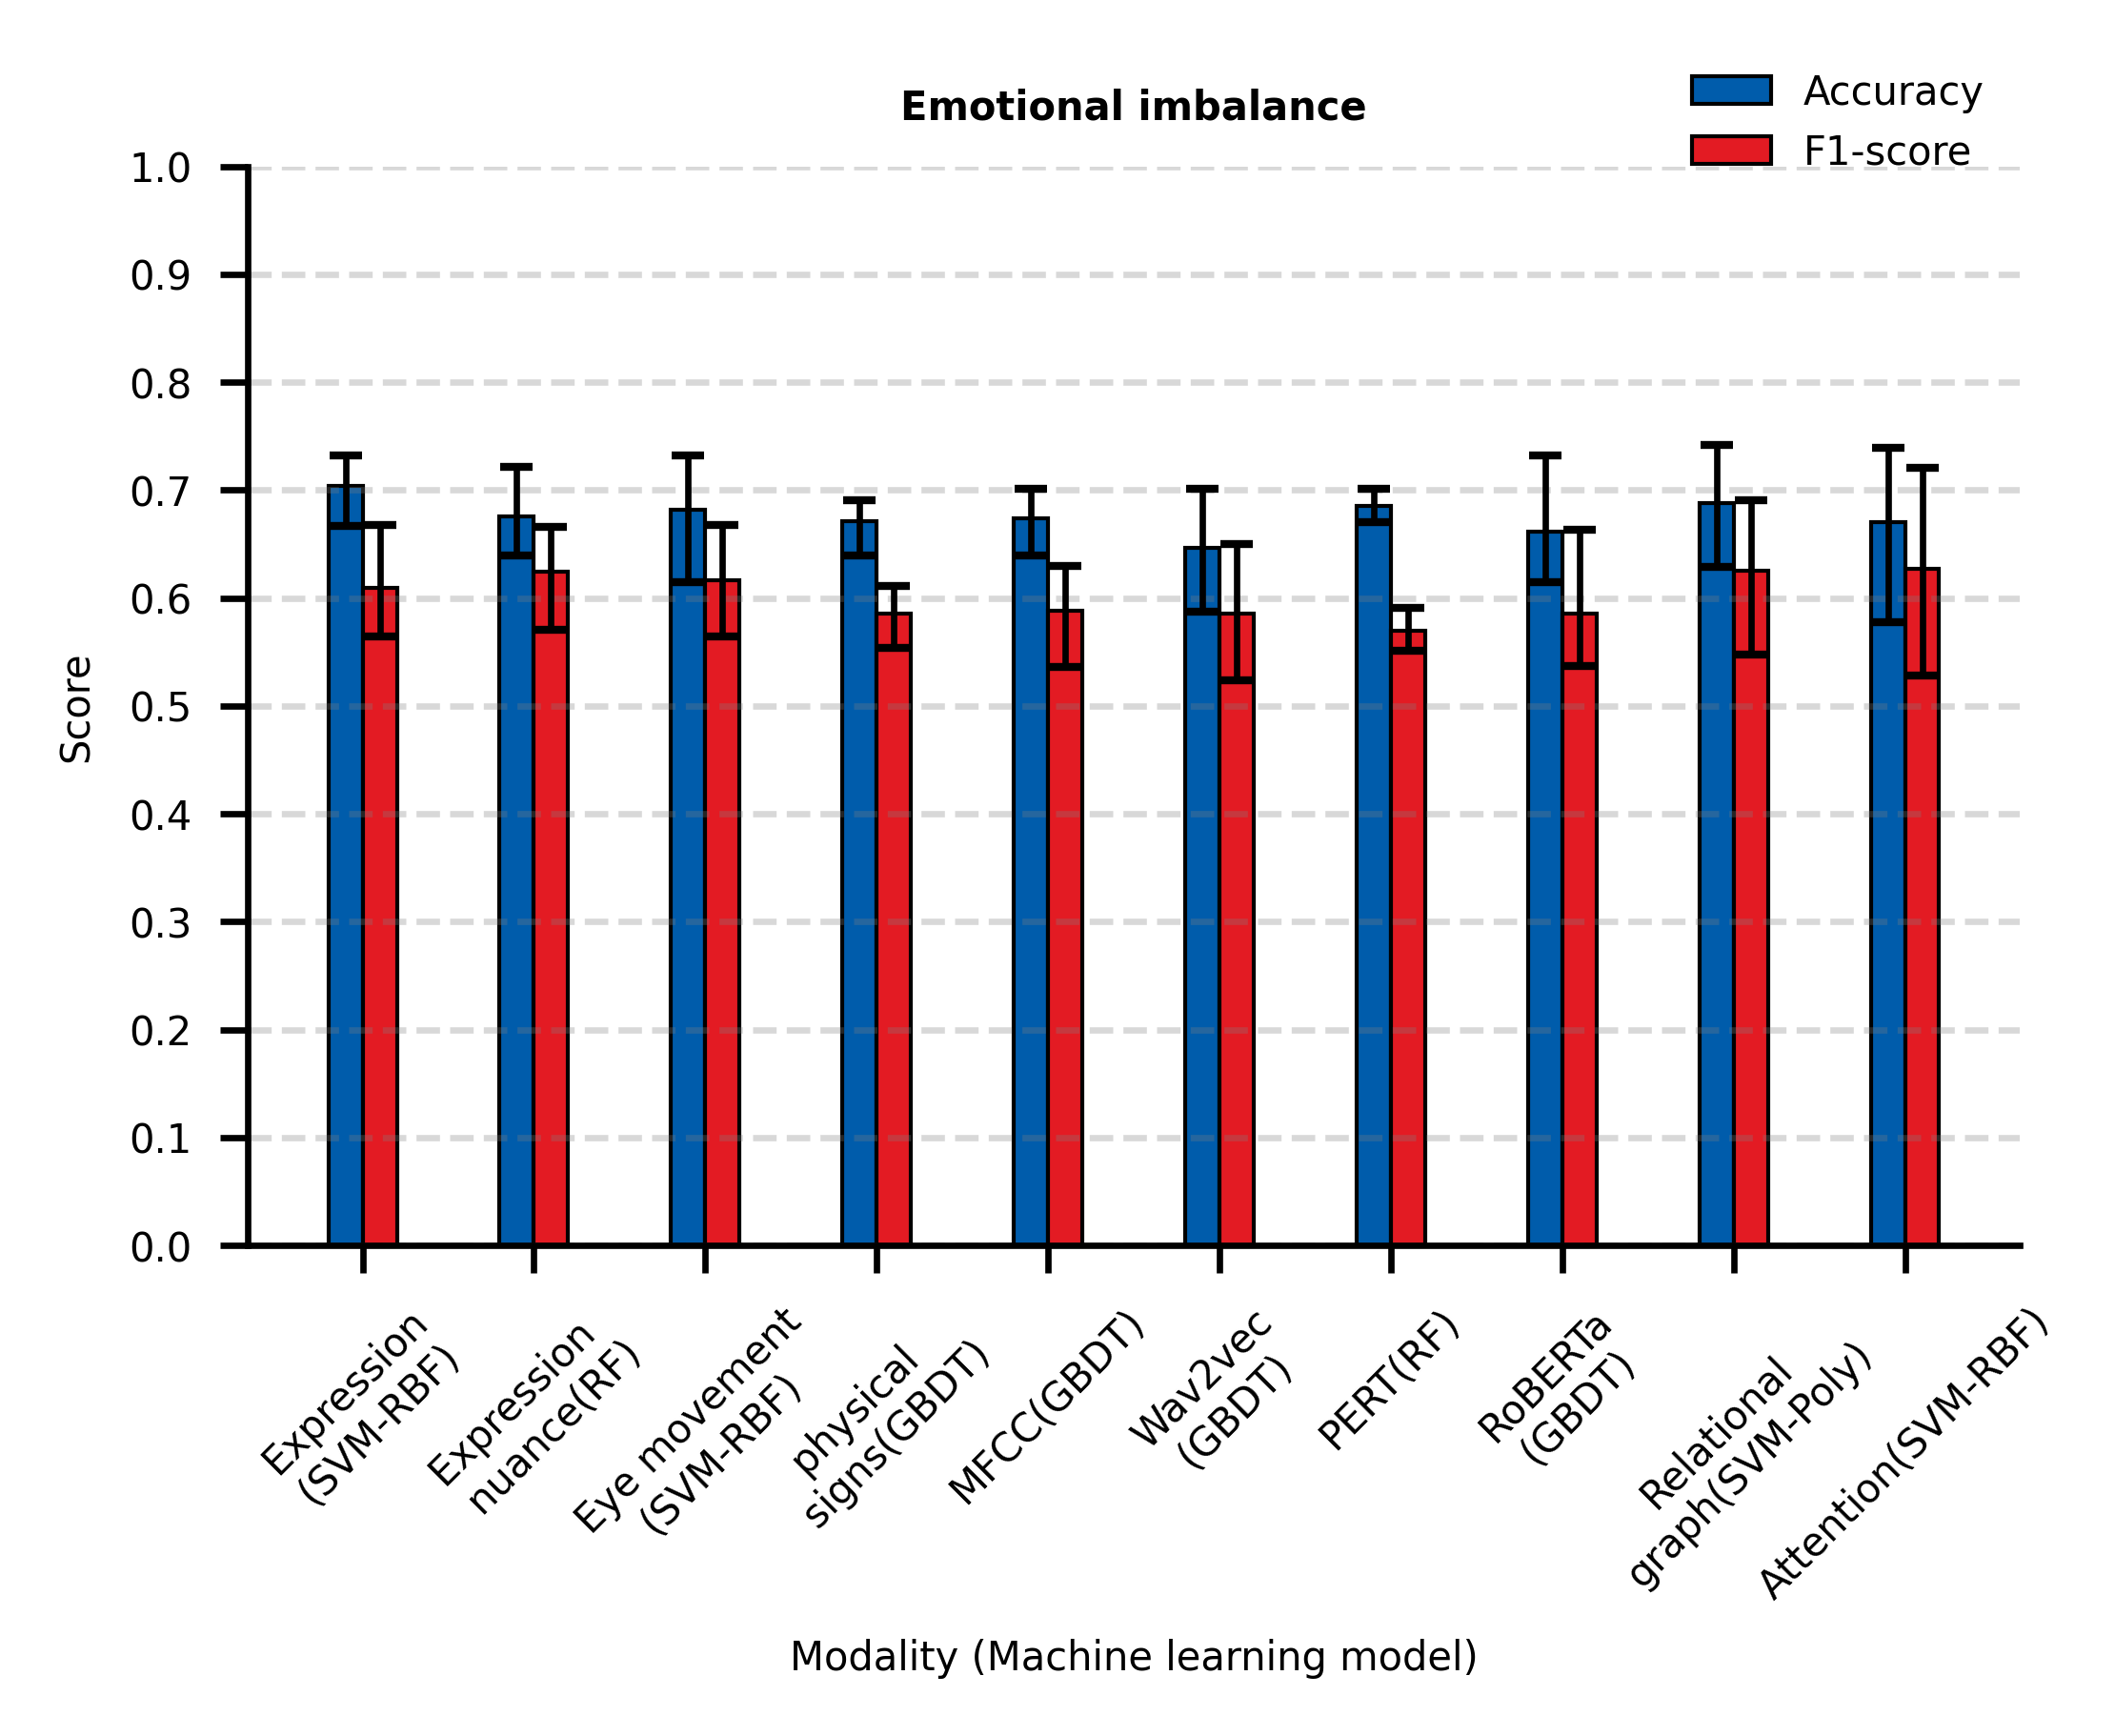

In [190]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-RBF)', 'Expression \n nuance(RF)', 'Eye movement\n(SVM-RBF)', 'physical \n signs(GBDT)', \
    'MFCC(GBDT)', 'Wav2vec\n(GBDT)',  'PERT(RF)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(SVM-Poly)', 'Attention(SVM-RBF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Emotional imbalance", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2j.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

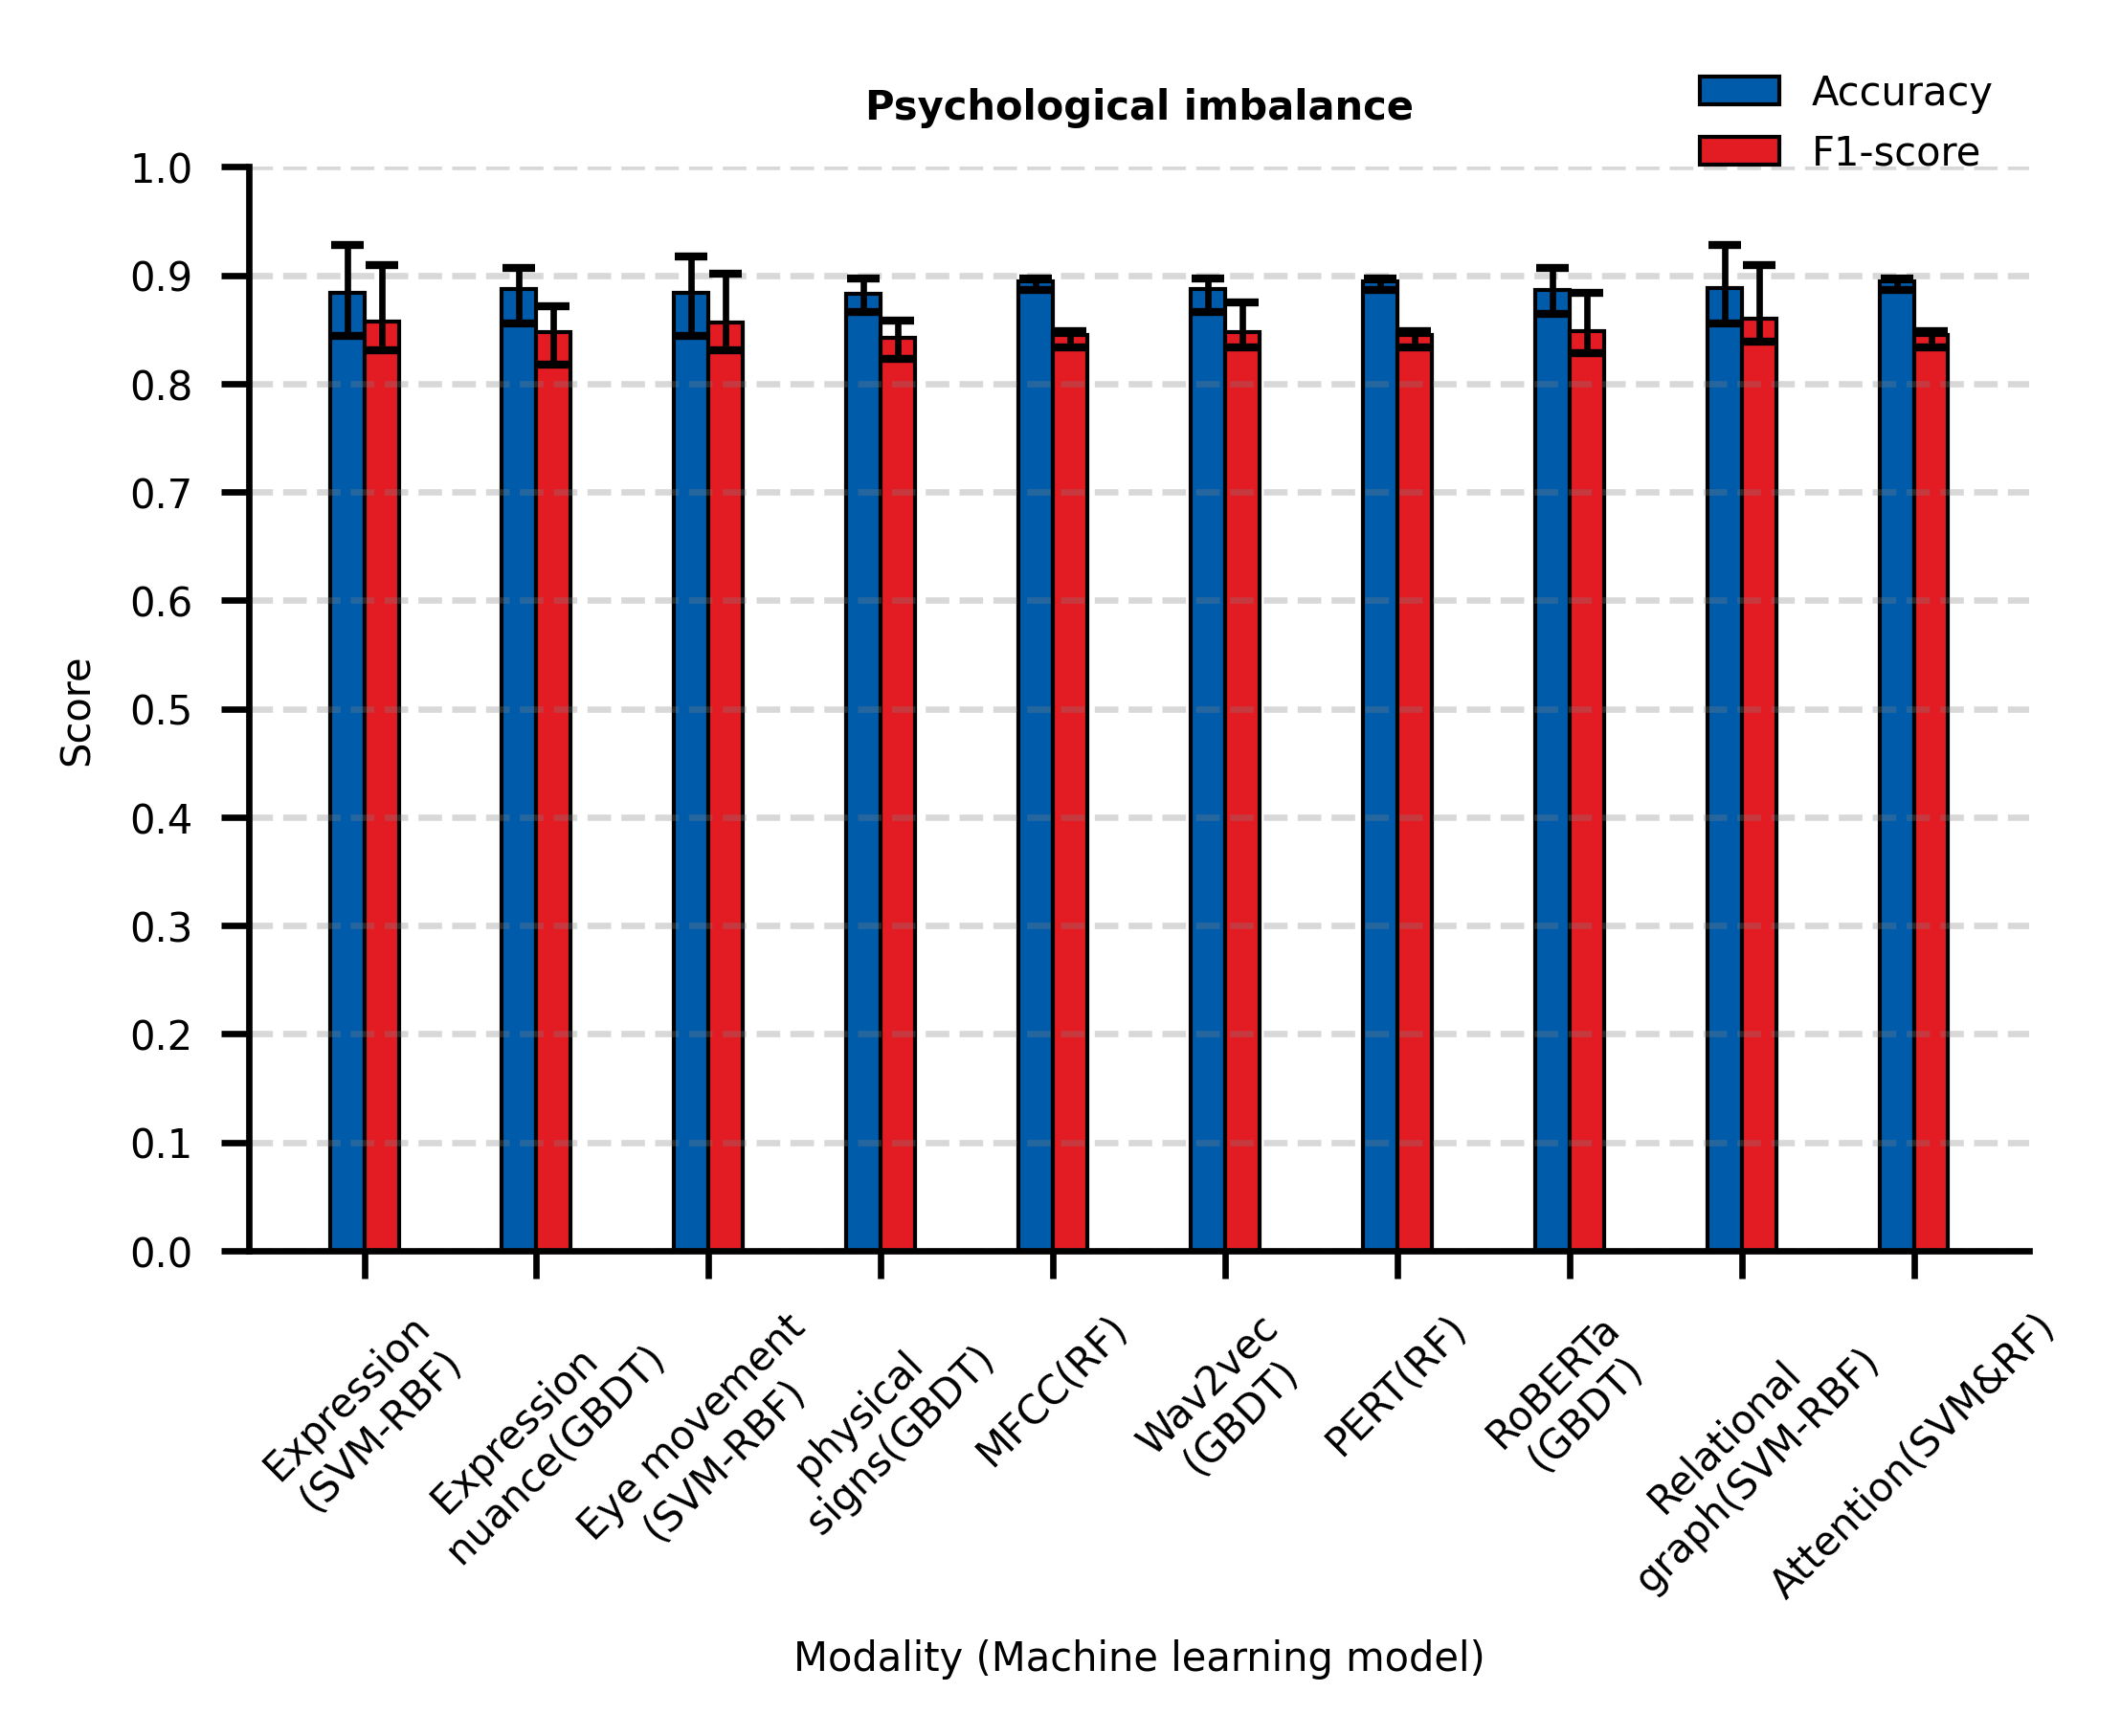

In [192]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-RBF)', 'Expression \n nuance(GBDT)', 'Eye movement\n(SVM-RBF)', 'physical \n signs(GBDT)', \
    'MFCC(RF)', 'Wav2vec\n(GBDT)',  'PERT(RF)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(SVM-RBF)', 'Attention(SVM&RF)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Psychological imbalance", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2k.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

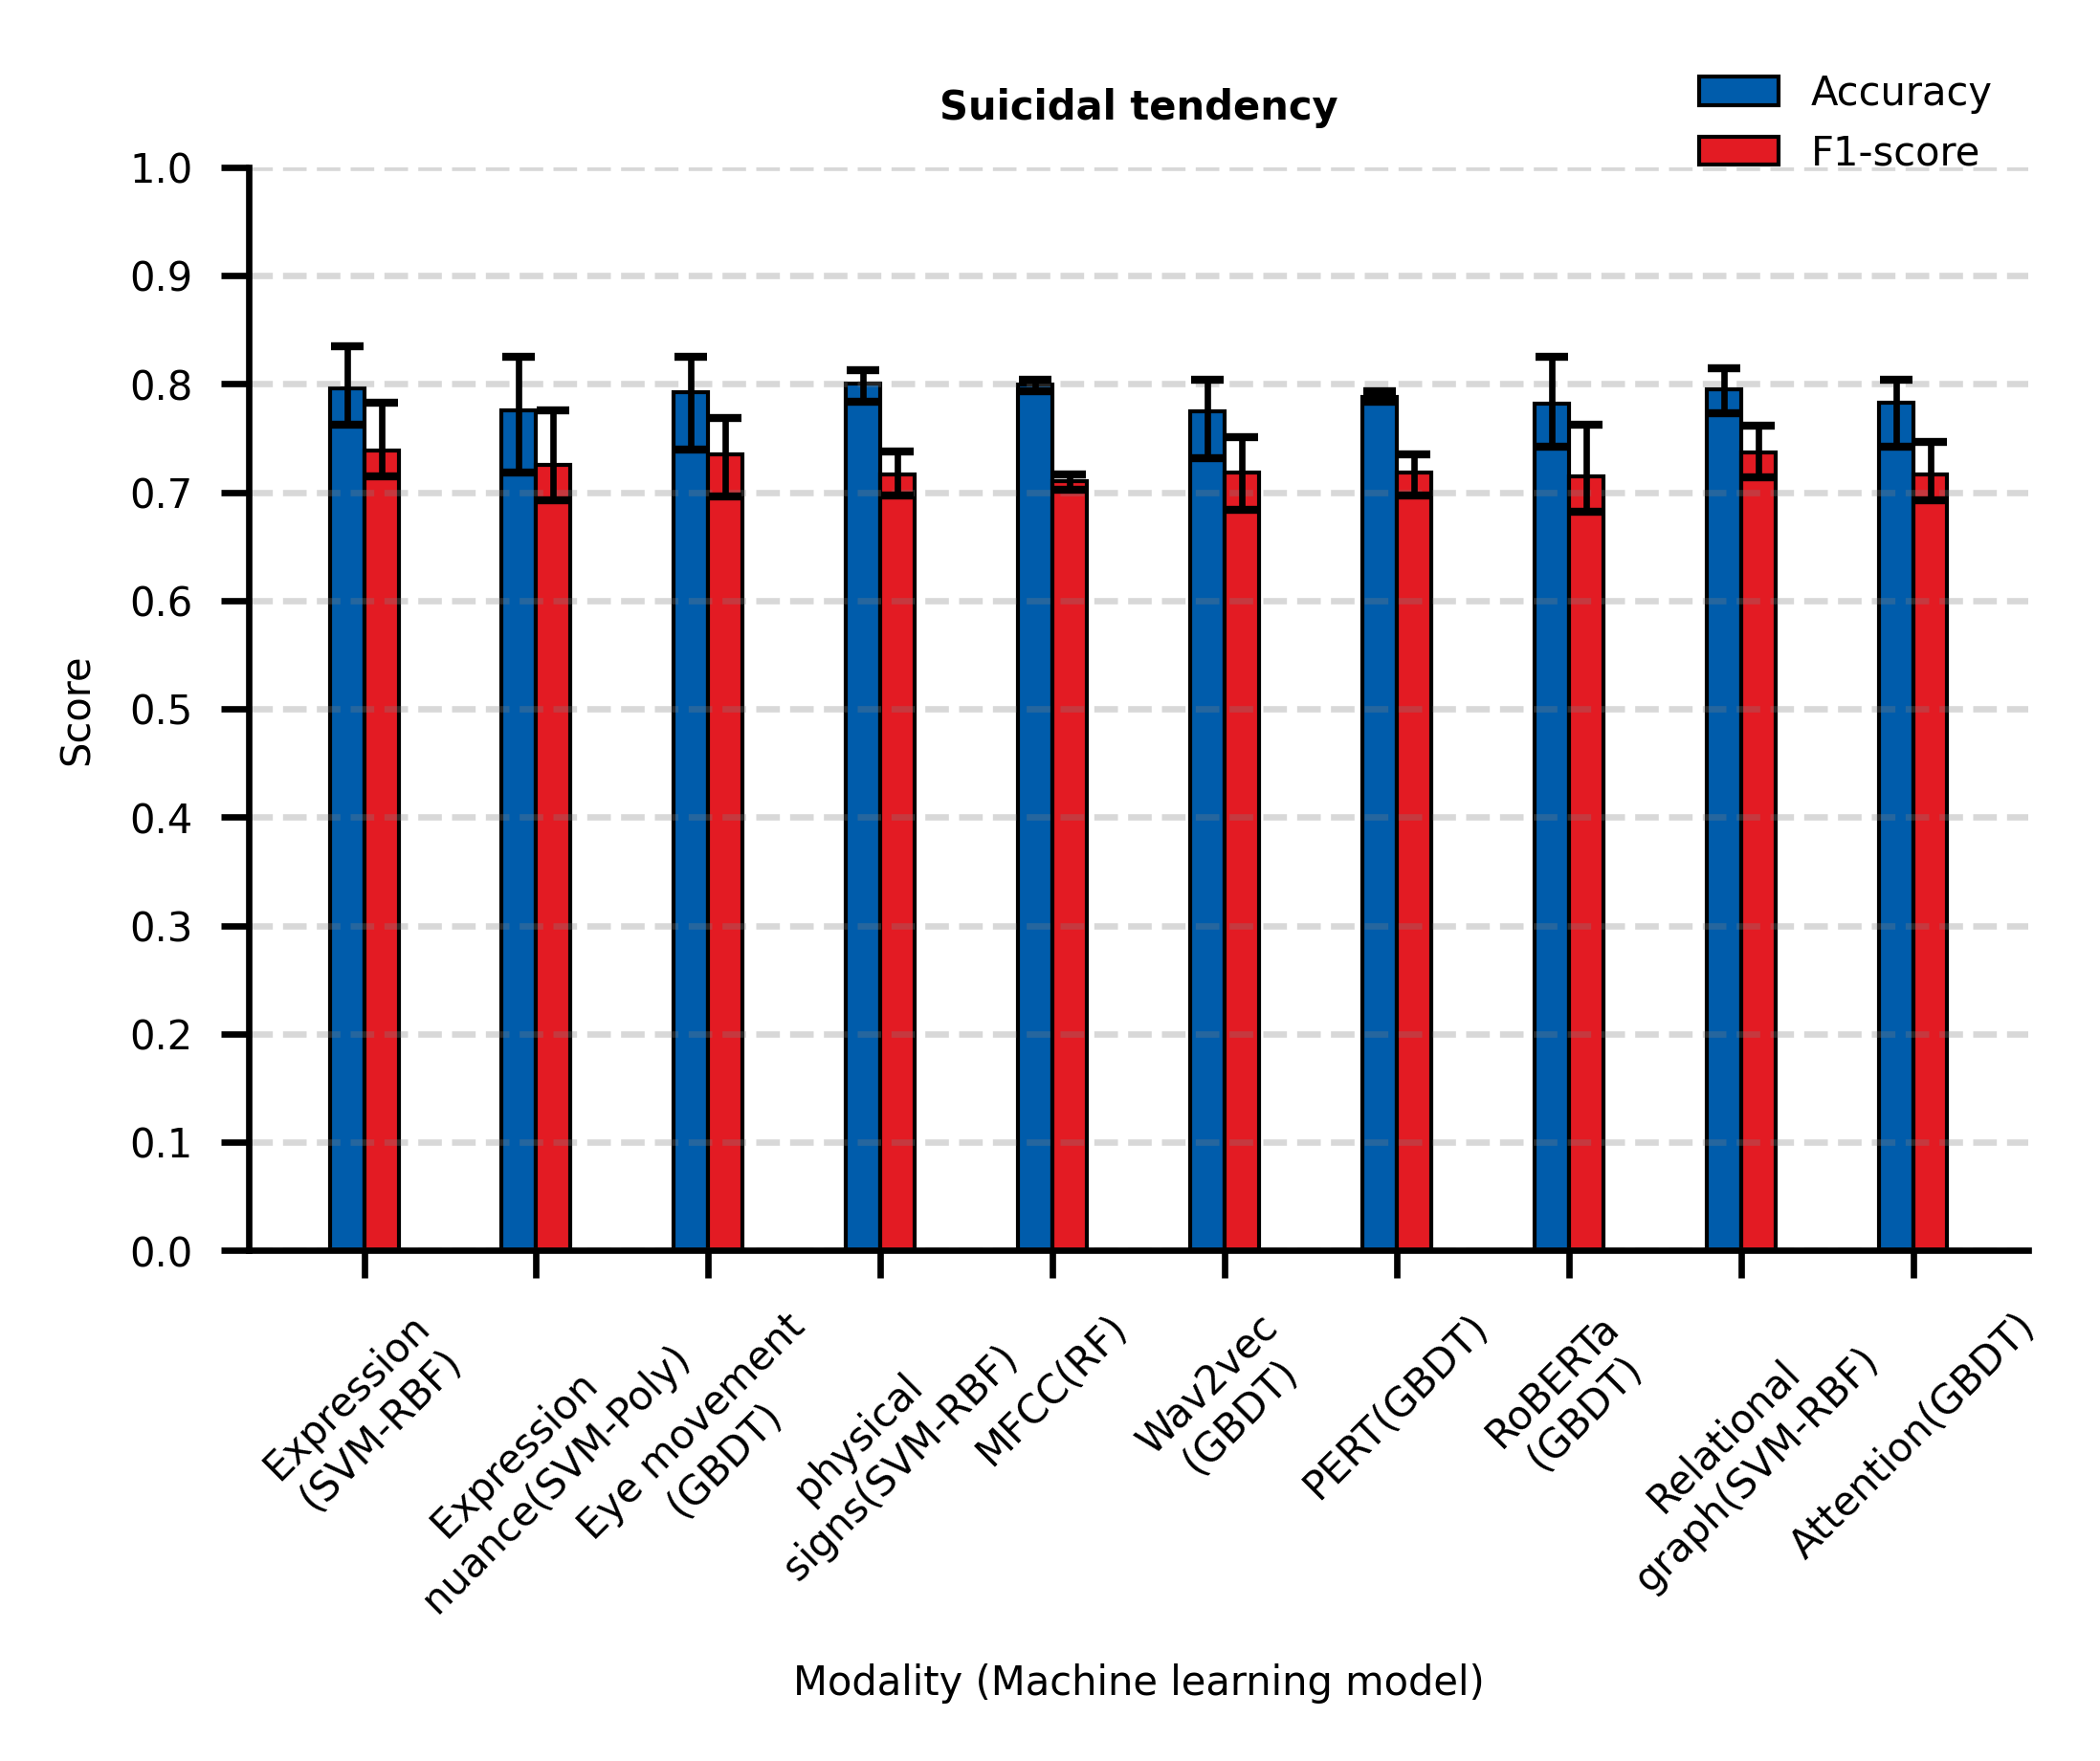

In [194]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Expression\n(SVM-RBF)', 'Expression \n nuance(SVM-Poly)', 'Eye movement\n(GBDT)', 'physical \n signs(SVM-RBF)', \
    'MFCC(RF)', 'Wav2vec\n(GBDT)',  'PERT(GBDT)', 'RoBERTa\n(GBDT)', 'Relational\ngraph(SVM-RBF)', 'Attention(GBDT)']
acc_a = acc_value[0]
f1_a = f1_value[0]

std_acca = [(acc_min[0]), (acc_max[0])] # min first max second
std_f1a = [(f1_min[0]), (f1_max[0])]

error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality (Machine learning model)",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Suicidal tendency", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure2l.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

In [13]:
#读取 excel 表格
acc_value = []
f1_value = []
acc_max = []
acc_min = []
f1_max = []
f1_min = []

df = pd.read_excel('./data.xlsx', sheet_name='Sheet2')
# print(df.head())
df = df.values.tolist()
# print(df)
for i in range(1, 13):
    acc_value.append(df[2][i])
    f1_value.append(df[5][i])
    acc_max.append(df[6][i])
    acc_min.append(df[7][i])
    f1_max.append(df[8][i])
    f1_min.append(df[9][i])

# acc_value = [acc_value]
acc_value = np.array(acc_value)

print("Acc:", acc_value)

f1_value = np.array(f1_value)
print("F1-score:", f1_value)

acc_max = np.array(acc_max)
print("Acc max diff:", acc_max)

acc_min = np.array(acc_min)
print("Acc min diff:", acc_min)

f1_max = np.array(f1_max)
print("F1-score max diff:", f1_max)

f1_min = np.array(f1_min)
print("F1-score min diff:", f1_min)



Acc: [0.82027491 0.71076031 0.80989046 0.67160653 0.59185997 0.82426976
 0.82744845 0.58886383 0.86152277 0.67056486 0.88843428 0.79644545]
F1-score: [0.79487452 0.66974279 0.75276161 0.62423642 0.57995253 0.78276863
 0.77254703 0.57320659 0.82579723 0.62668551 0.85986575 0.73895671]
Acc max diff: [0.05601375 0.04181701 0.03547036 0.07839347 0.12978952 0.04170962
 0.04884021 0.0569695  0.03538445 0.06901847 0.03940077 0.0386061 ]
Acc min diff: [0.05738832 0.04065722 0.0494738  0.10459622 0.16477663 0.08468643
 0.04619845 0.0367805  0.08027277 0.09324527 0.03276418 0.03355885]
F1-score max diff: [0.06934889 0.04835896 0.04895581 0.09781518 0.12564025 0.06265564
 0.07718008 0.07441137 0.04178936 0.09368341 0.04993573 0.0437856 ]
F1-score min diff: [0.07213985 0.06247527 0.04106591 0.07037853 0.14543197 0.06335224
 0.04199587 0.043172   0.05825337 0.0985368  0.0206152  0.02392401]


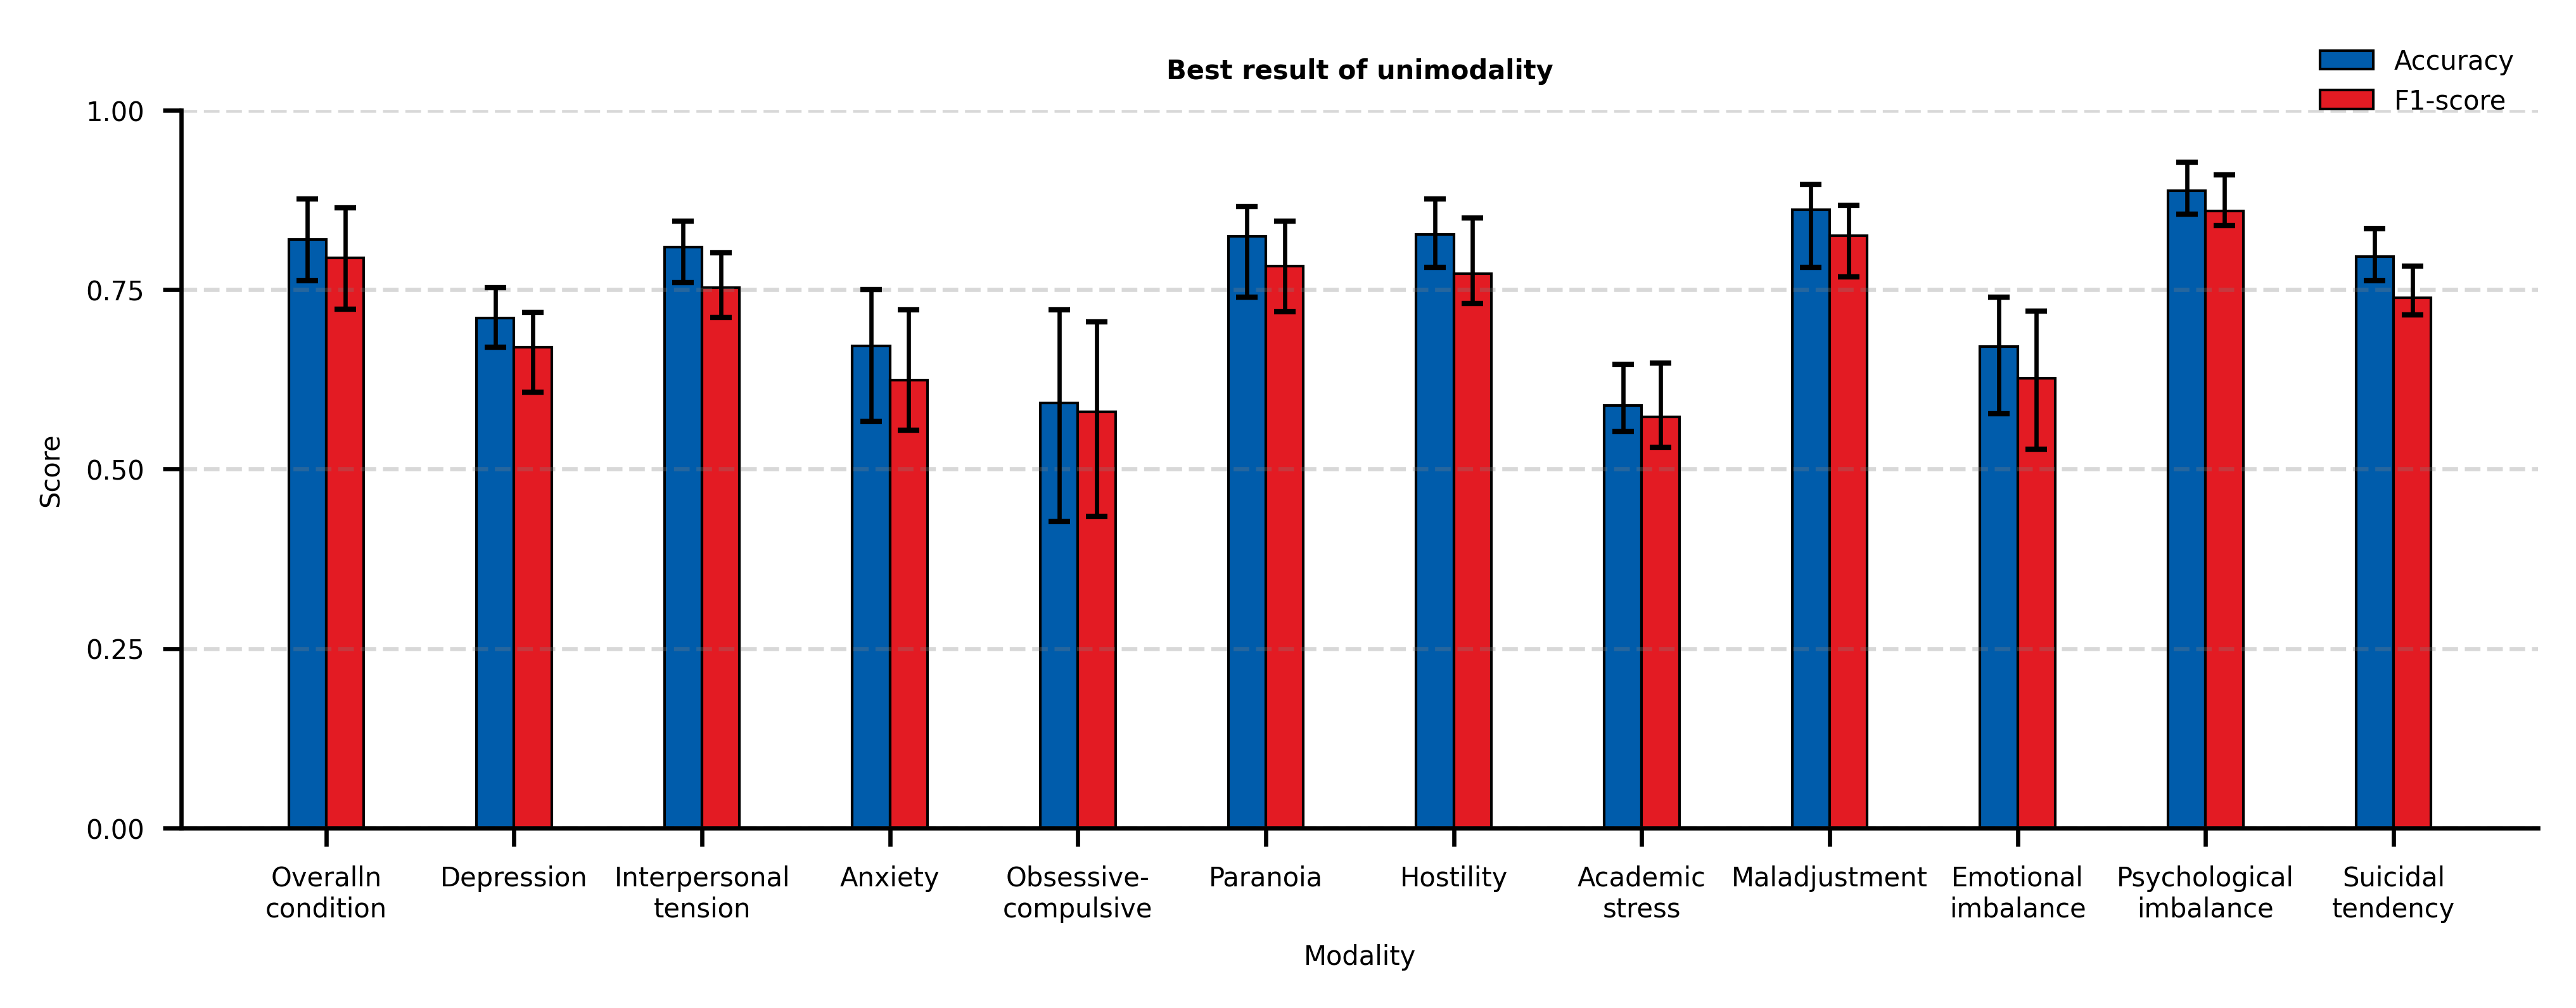

In [18]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Overalln\ncondition', 'Depression', 'Interpersonal\ntension', 'Anxiety', 'Obsessive-\ncompulsive', 'Paranoia', \
    'Hostility', 'Academic\nstress', 'Maladjustment', 'Emotional\nimbalance', 'Psychological\nimbalance', 'Suicidal\ntendency']
acc_a = acc_value
f1_a = f1_value

std_acca = [(acc_min), (acc_max)] # min first max second
std_f1a = [(f1_min), (f1_max)]


error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(8,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.25), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality",fontproperties=font)

plt.xticks(fontsize=5, rotation=0)
plt.yticks(fontsize=5)

plt.title("Best result of unimodality", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./Best unimodal.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

In [248]:
#读取 excel 表格
acc_value = []
f1_value = []
acc_max = []
acc_min = []
f1_max = []
f1_min = []

df = pd.read_excel('./data.xlsx', sheet_name='Sheet2')
# print(df.head())
df = df.values.tolist()
# print(df)
for i in range(1, 13):
    acc_value.append(df[14][i])
    f1_value.append(df[17][i])
    acc_max.append(df[18][i])
    acc_min.append(df[19][i])
    f1_max.append(df[20][i])
    f1_min.append(df[21][i])

# acc_value = [acc_value]
acc_value = np.array(acc_value)

print("Acc:", acc_value)

f1_value = np.array(f1_value)
print("F1-score:", f1_value)

acc_max = np.array(acc_max)
print("Acc max diff:", acc_max)

acc_min = np.array(acc_min)
print("Acc min diff:", acc_min)

f1_max = np.array(f1_max)
print("F1-score max diff:", f1_max)

f1_min = np.array(f1_min)
print("F1-score min diff:", f1_min)



Acc: [0.89256873 0.80162156 0.85847294 0.77584837 0.73041237 0.87084407
 0.86776203 0.74180627 0.90083763 0.7716817  0.92770619 0.85434923]
F1-score: [0.87492499 0.76799871 0.82764888 0.74827252 0.71321308 0.83594158
 0.83540345 0.73056107 0.87647353 0.73001768 0.91055388 0.82204212]
Acc max diff: [0.03526632 0.0231207  0.028125   0.02623497 0.0300043  0.01575387
 0.01765464 0.07069373 0.01582904 0.03244201 0.02021048 0.03224871]
Acc min diff: [0.01628007 0.02037156 0.0251396  0.02327105 0.02938144 0.01667741
 0.02401203 0.05108462 0.0050043  0.05003222 0.01018041 0.01929768]
F1-score max diff: [0.04430151 0.02355009 0.03958343 0.04350306 0.03844805 0.03326357
 0.03235858 0.0740295  0.02125374 0.04917733 0.03321363 0.0451902 ]
F1-score min diff: [0.02077096 0.02803056 0.03391531 0.02748527 0.03470984 0.03262102
 0.04655724 0.05571148 0.01491655 0.0599049  0.01870689 0.03929981]


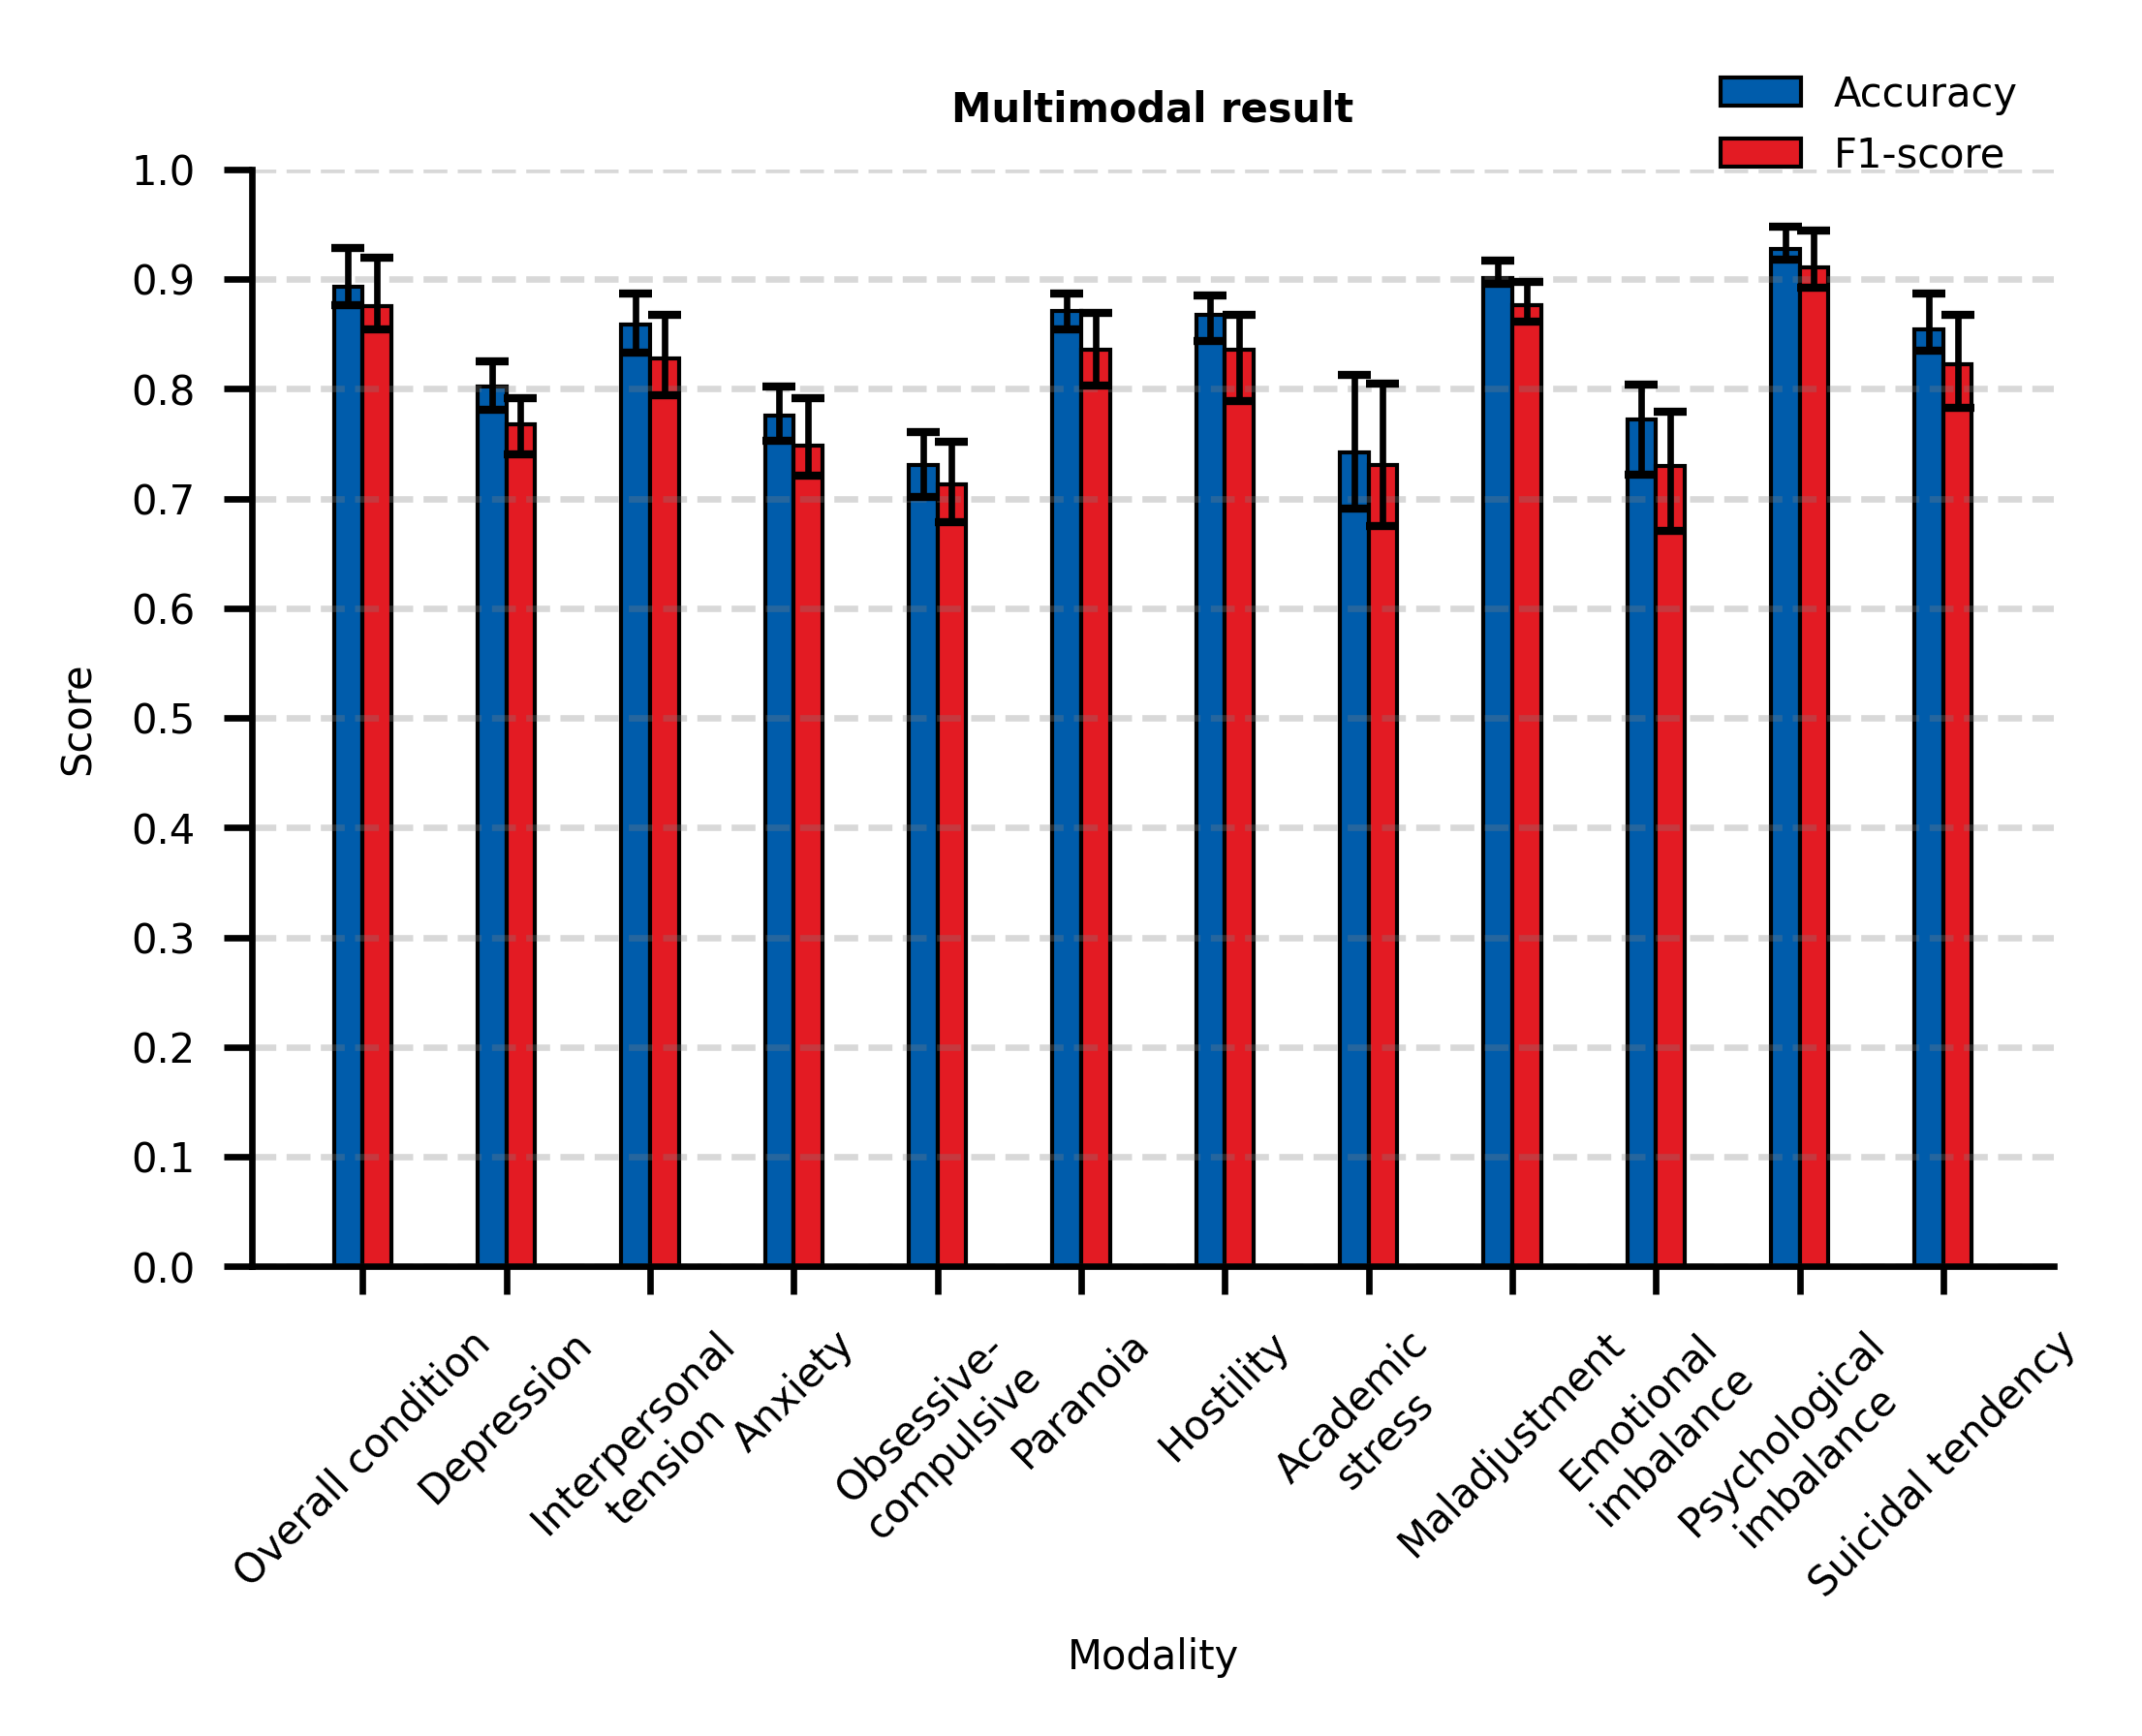

In [250]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['Overall condition', 'Depression', 'Interpersonal\ntension', 'Anxiety', 'Obsessive-\ncompulsive', 'Paranoia', \
    'Hostility', 'Academic\nstress', 'Maladjustment', 'Emotional\nimbalance', 'Psychological\nimbalance', 'Suicidal tendency']
acc_a = acc_value
f1_a = f1_value

std_acca = [(acc_min), (acc_max)] # min first max second
std_f1a = [(f1_min), (f1_max)]


error_params=dict(elinewidth=0.8, ecolor='black',capsize=2)#设置误差标记参数
x = np.arange(len(labels))

total_width = .8
n = 4
width = total_width / n
x = x - (total_width - width) / 2

# plt.rcParams['font.family'] = "sans-seri"
#plots
fig,ax = plt.subplots(figsize=(4,2.5), dpi=600)
bar_a = ax.bar(x-width * 1/2, acc_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
    yerr=std_acca,error_kw=error_params)
bar_b = ax.bar(x+width * 1/2, f1_a, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
    yerr=std_f1a,error_kw=error_params)

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=5)
ax.set_ylim(bottom=0,top=1)
ax.set_yticks(np.arange(0, 1.01, step=0.1), size=5)

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Modality",fontproperties=font)

plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)

plt.title("Multimodal result", fontname="sans-serif", \
    fontweight="bold", fontsize=5)

plt.grid(True,axis='y',ls='--',color='gray',alpha=0.3)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('sans-serif')
font.set_size(5)
ax.legend(fontsize=5,frameon=False, prop=font,bbox_to_anchor=(1,1.12))
 
# plt.grid(axis="y", linestyle='--', color='#E6F1EE')
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./Multimodal.png', bbox_inches='tight')
# plt.savefig('./figure2a.pdf', bbox_inches='tight')
plt.show()

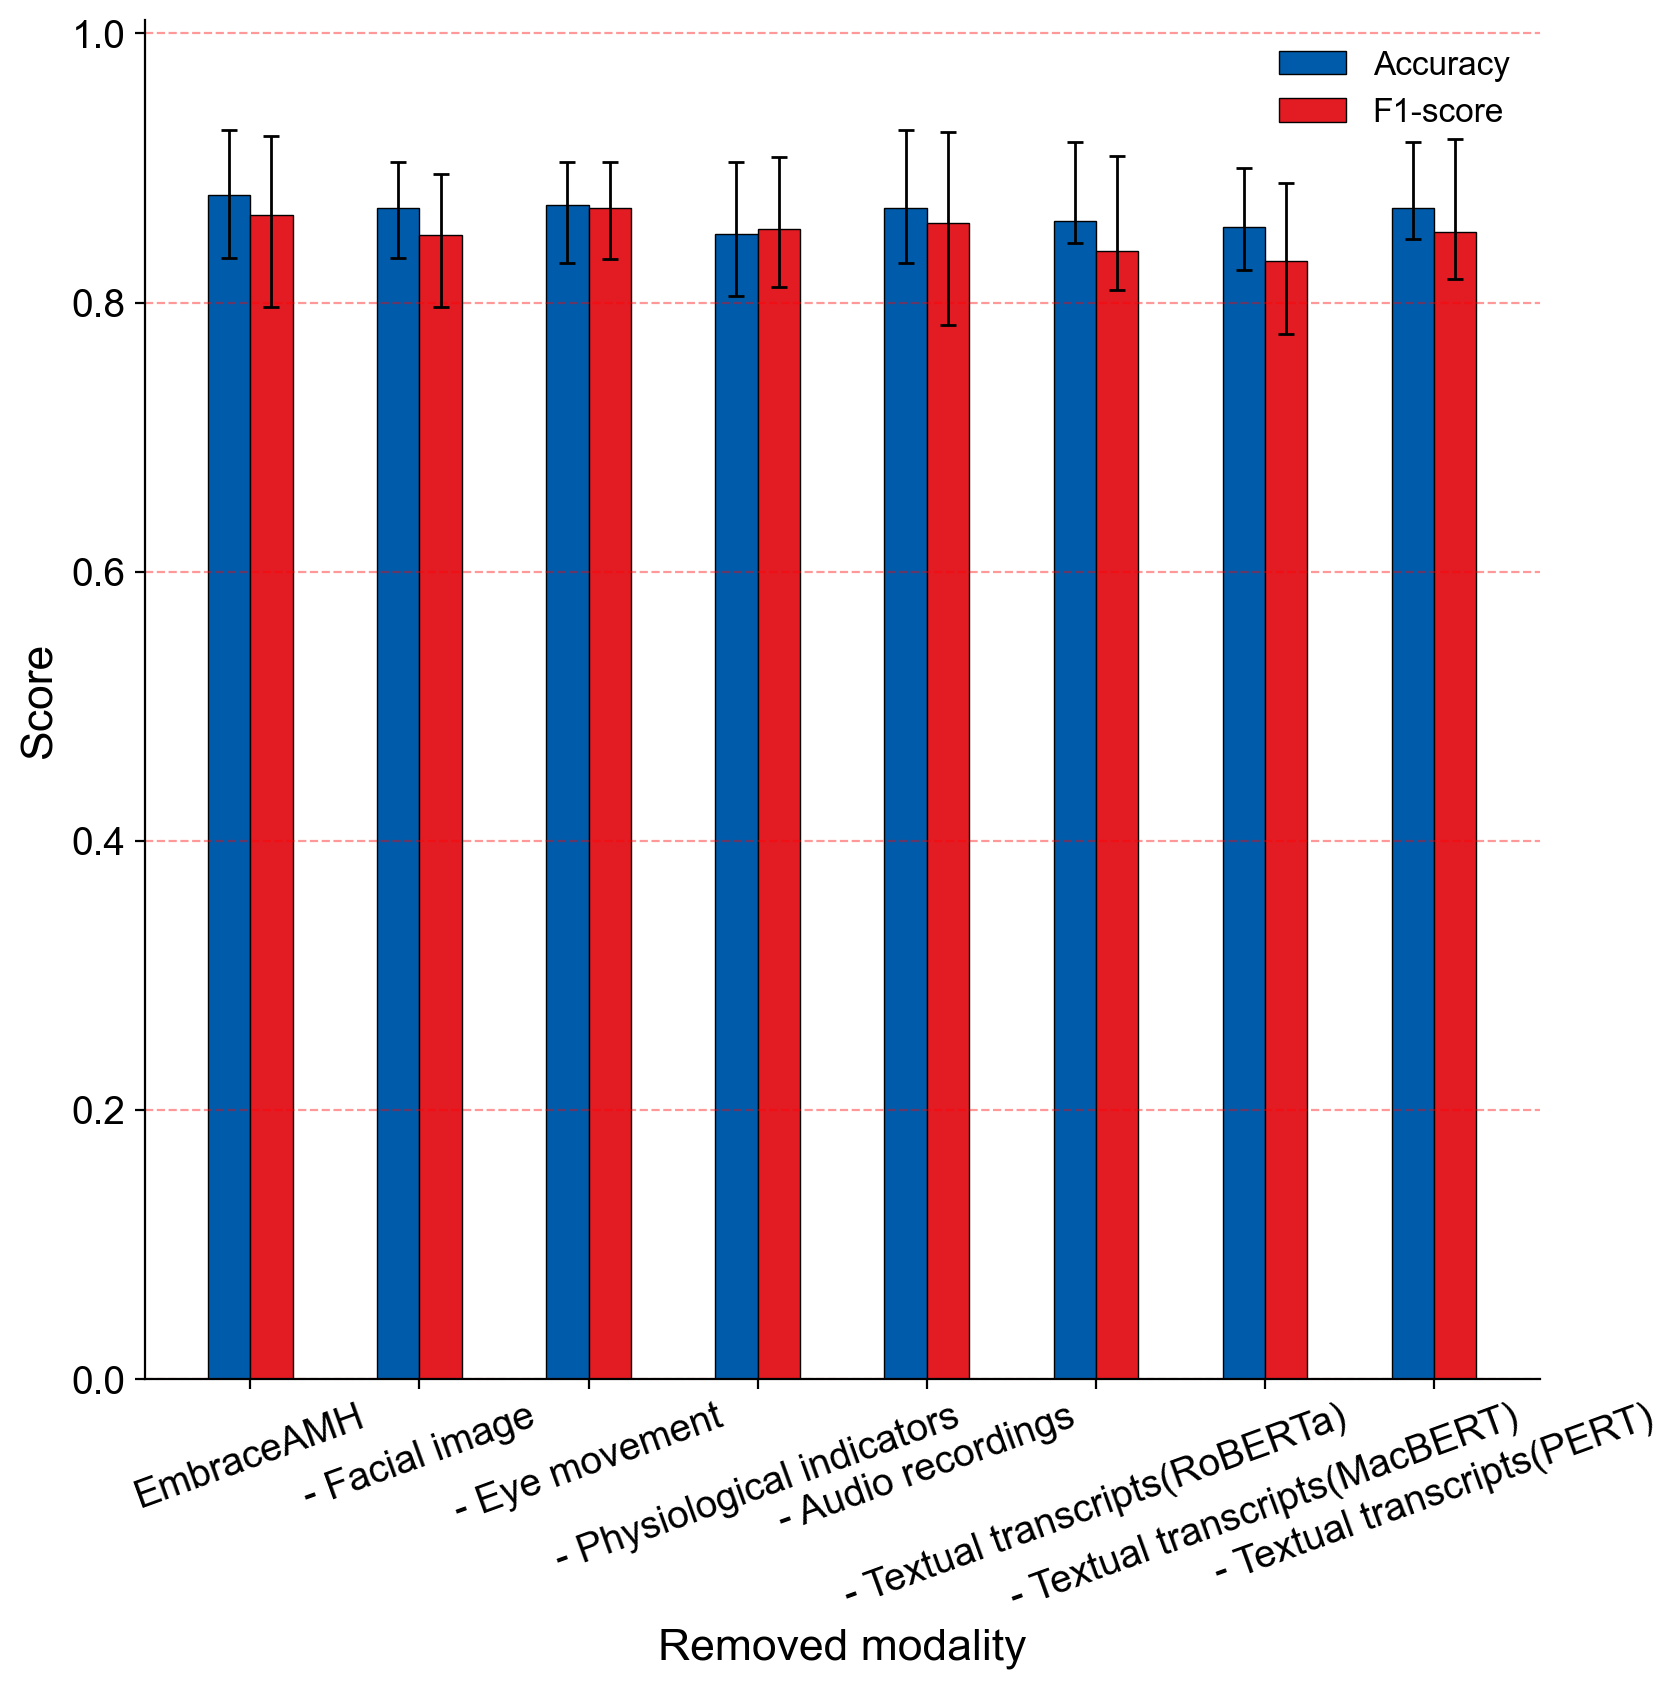

In [23]:
from matplotlib.font_manager import FontProperties
#构造数据
labels = ['EmbraceAMH', '- Facial image', '- Eye movement',\
     '- Physiological indicators', '- Audio recordings', '- Textual transcripts(RoBERTa)', \
         '- Textual transcripts(MacBERT)','- Textual transcripts(PERT)']
data_a = [0.880023229, 0.870499419, 0.8728223, .851103368176538, .870383275261324, .860801393728223, .856097560975609, .870383275261324 ]
data_b = [0.865402084, 0.849951067403014, 0.87016, .854494378815, .85946213017586, .83806291371817, .831238013795482, .852346445471083]
# data_c = [.785714, .809524, .833333, .833333, .880952,  .761905,  .809524, .731707, .780488, .780488, 1]
std_err = [(0.046689895, 0.037166086,0.043554007,0.046225319,0.041114983,0.016724739,0.031533101,0.022764228), \
    (0.0485482,0.034262485,0.031939605,0.053658537,0.058188153,0.058188153,0.043960511,0.048664344)]

std_err1 = [([0.068724583, 0.053273567, 0.037756065, 0.043007361, 0.076101211, 0.029001498, 0.054701994, 0.034560513]),\
    (0.058465971, 0.045707196,0.034599621, 0.053541335, 0.067541507, 0.070634921, 0.05759535, 0.06897207
 )]
error_params=dict(elinewidth=1, ecolor='black',capsize=3)#设置误差标记参数
x = np.arange(len(labels))
width = .25

plt.rcParams['font.family'] = "Arial"
#plots
fig,ax = plt.subplots(figsize=(9,9), dpi=200)
bar_a = ax.bar(x-width/2, data_a,width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
yerr=std_err,error_kw=error_params)
bar_b = ax.bar(x+width/2, data_b, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
yerr=std_err1,error_kw=error_params)

# bar_a = ax.barh(x-width/2, data_a, width,label='Accuracy',color='#005CAB',ec='black',lw=.5,\
# yerr=std_err,error_kw=error_params)
# bar_b = ax.barh(x+width/2, data_b, width,label='F1-score',color='#E31B23',ec='black',lw=.5, \
# yerr=std_err1,error_kw=error_params)

# bar_c = ax.bar(x+width*3/2, data_/c,width,label='Recall score',color='#DCEEF3',ec='black',lw=.5)

# plt.plot(x, data_a, color='#003366', label='F1-score', marker='v')
# plt.plot(x, data_b, color='#E31B23', label='Precision score', marker='o')
# plt.plot(x, data_c, color='#FFC325', label='Recall score', marker='^')

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=10)
ax.set_ylim(bottom=0,top=1.01)
ax.set_yticks(np.arange(0, 1.01, step=0.2))

font = FontProperties()
font.set_name('Arial')
font.set_size(16)
ax.set_ylabel("Score",fontproperties=font)
ax.set_xlabel("Removed modality",fontproperties=font)

plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=14)

# plt.title("Textual modal with ROS + RoBERTa + RF model", fontname="Arial", \
#     fontweight="bold", fontsize=16)

plt.grid(True,axis='y',ls='--',color='r',alpha=0.4)
for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('Arial')
font.set_size(12)
ax.legend(frameon=False, prop=font)

# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figure5b.pdf',
            bbox_inches='tight')
plt.show()

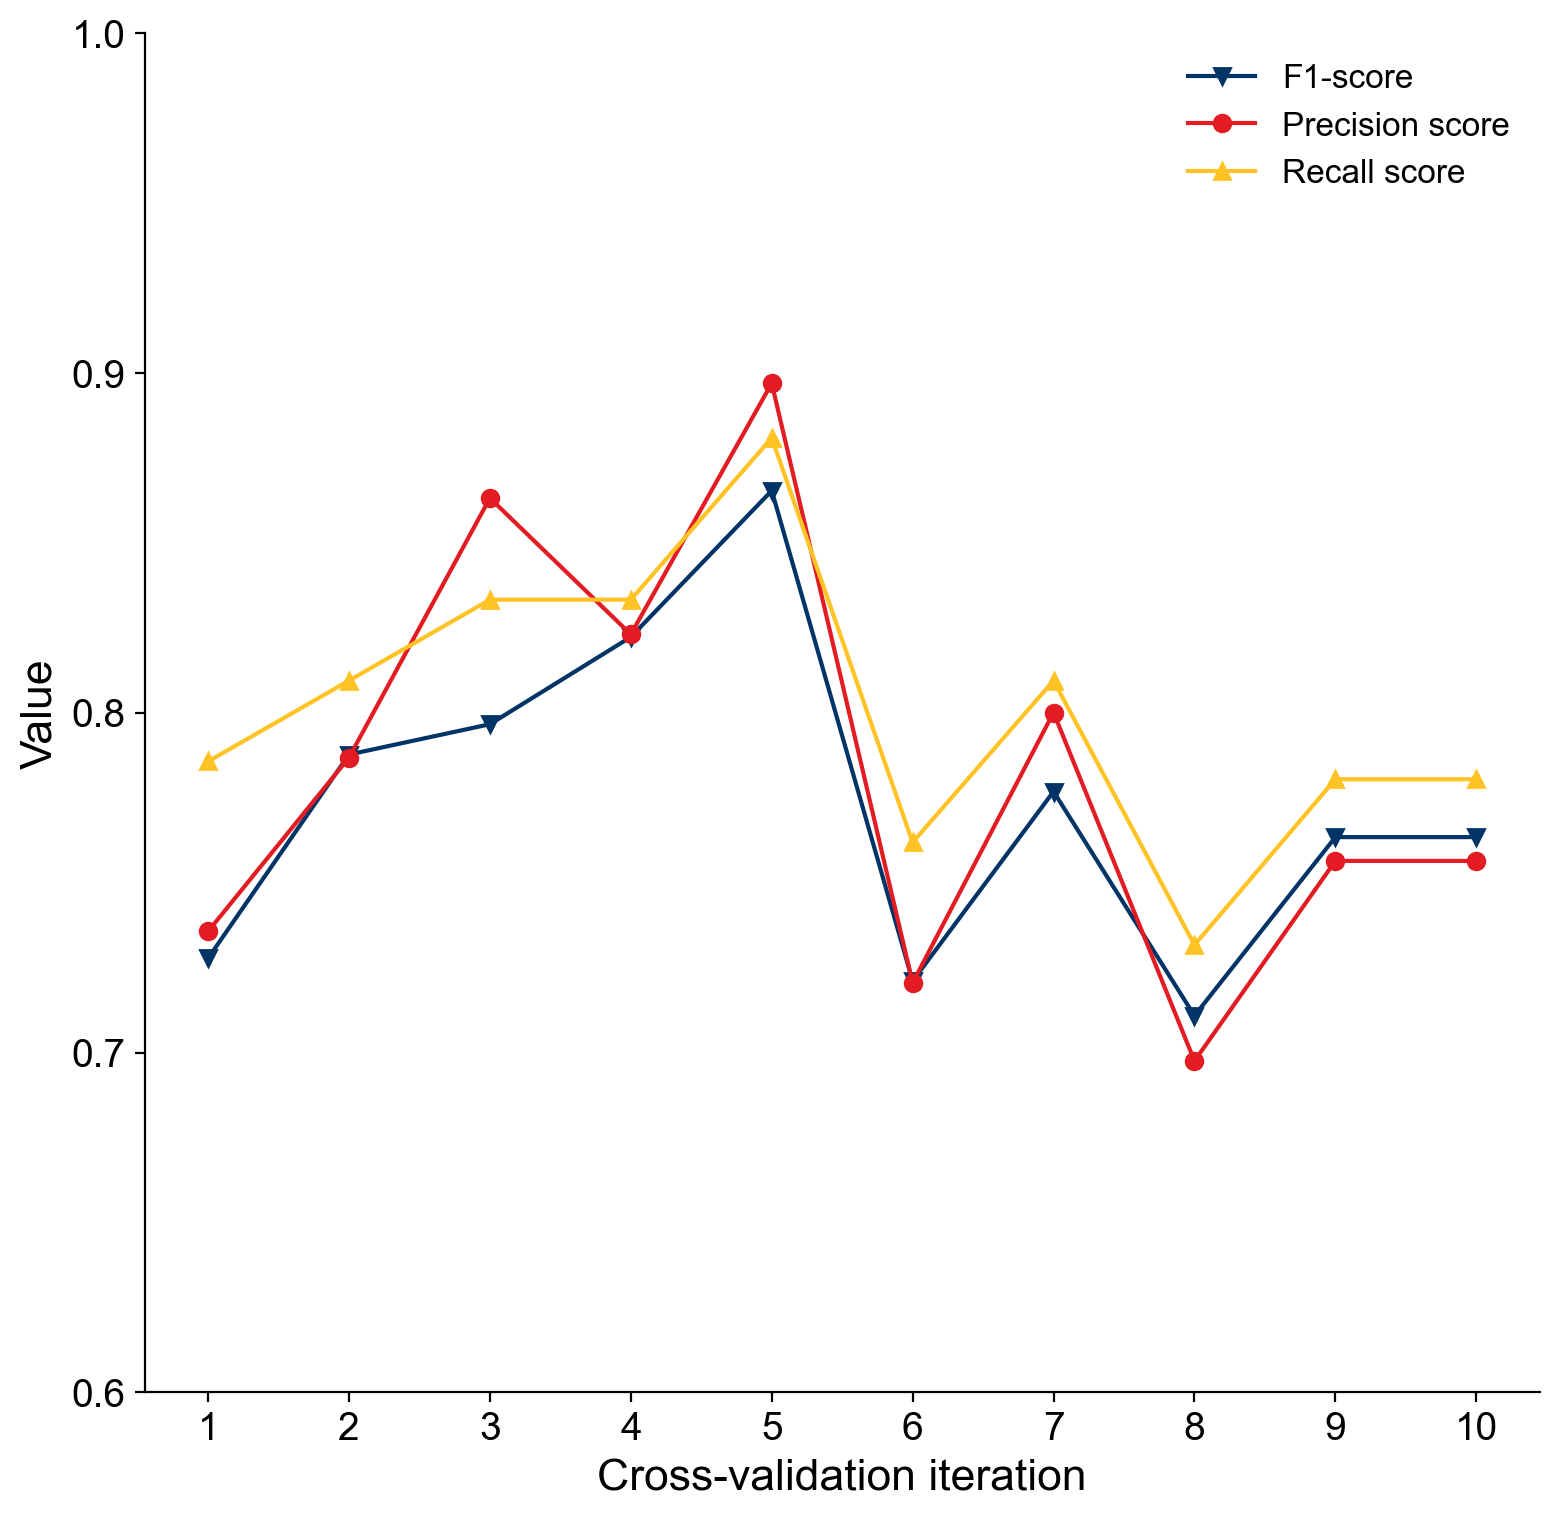

In [14]:
#构造数据
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
data_a = [.727806, .787755, .796678, .822359, .865424, .721088, .776871, .710885, .763451, .763451]
data_b = [.735714, .786873, .863248, .823129, .89704, .720551, .800125, .697561, .756446, .756446]
data_c = [.785714, .809524, .833333, .833333, .880952,  .761905,  .809524, .731707, .780488, .780488]

x = np.arange(len(labels))
width = .25

plt.rcParams['font.family'] = "Arial"
#plots
fig,ax = plt.subplots(figsize=(9,9), dpi=200)
# bar_a = ax.bar(x-width/2, data_a,width,label='F1-score',color='#005CAB',ec='black',lw=.5)
# bar_b = ax.bar(x+width/2, data_b, width,label='Precision score',color='#E31B23',ec='black',lw=.5)
# bar_c = ax.bar(x+width*3/2, data_c,width,label='Recall score',color='#DCEEF3',ec='black',lw=.5)

plt.plot(x, data_a, color='#003366', label='F1-score', marker='v')
plt.plot(x, data_b, color='#E31B23', label='Precision score', marker='o')
plt.plot(x, data_c, color='#FFC325', label='Recall score', marker='^')

#定制化设计
# ax.tick_params(axis='x',direction='in',bottom=False)
# ax.tick_params(axis='y',direction='out',labelsize=8,length=3)

ax.set_xticks(x)
ax.set_xticklabels(labels,size=10)
ax.set_ylim(bottom=0.6,top=1)
ax.set_yticks(np.arange(0.6, 1.05, step=0.1))

font = FontProperties()
font.set_name('Arial')
font.set_size(16)
ax.set_ylabel("Value",fontproperties=font)
ax.set_xlabel("Cross-validation iteration",fontproperties=font)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.title("Textual modal with ROS + RoBERTa + RF model", fontname="Arial", \
#     fontweight="bold", fontsize=16)


for spine in ['top','right']:
    ax.spines[spine].set_color('none')

font = FontProperties()
font.set_name('Arial')
font.set_size(12)
ax.legend(fontsize=7,frameon=False, prop=font)

# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
plt.savefig('./result.pdf',
            bbox_inches='tight')
plt.show()